In [1]:
import pandas as pd
from utils import train as tr

In [2]:
players = pd.read_csv("data/0-1-IneriaRanks.csv")
players=players.set_index(players.columns[0])
pairs = pd.read_csv("data/0-1-PlayerPairs.csv")
pairs.head()

Unnamed: 0                      player1            player2
0           0               Carlos Alcaraz      Nicolas Jarry
1           1             Alexander Zverev  Matteo Berrettini
2           2               Frances Tiafoe    Grigor Dimitrov
3           3  Alejandro Davidovich Fokina        Holger Rune
4           4              Daniil Medvedev   Marton Fucsovics

In [3]:
_dictionary = pd.read_csv("data_dictionary.csv")
_data = pd.read_csv("Wimbledon_featured_matches.csv")

In [4]:
dictionary = _dictionary.copy()
data = _data.copy()
data.head()

match_id         player1        player2 elapsed_time  set_no  \
0  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:00       1   
1  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:38       1   
2  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:01       1   
3  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:31       1   
4  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:02:21       1   

   game_no  point_no  p1_sets  p2_sets  p1_games  ...  p2_break_pt_won  \
0        1         1        0        0         0  ...                0   
1        1         2        0        0         0  ...                0   
2        1         3        0        0         0  ...                0   
3        1         4        0        0         0  ...                0   
4        1         5        0        0         0  ...                0   

  p1_break_pt_missed p2_break_pt_missed  p1_distance_run  p2_distance_run  \
0                  0                  0            6.000            7.840   
1                  0                  0            5.253            7.094   
2                  0                  0           13.800           19.808   
3                  0                  0           51.108           75.631   
4                  0                  0            0.649            0.813   

   rally_count  speed_mph  serve_width  serve_depth  return_depth  
0            2       95.0           BC         NCTL            ND  
1            1      118.0            B          CTL            ND  
2            4      120.0            B         NCTL             D  
3           13      130.0           BW          CTL             D  
4            1      112.0            W         NCTL           NaN  

[5 rows x 46 columns]

# Self Training

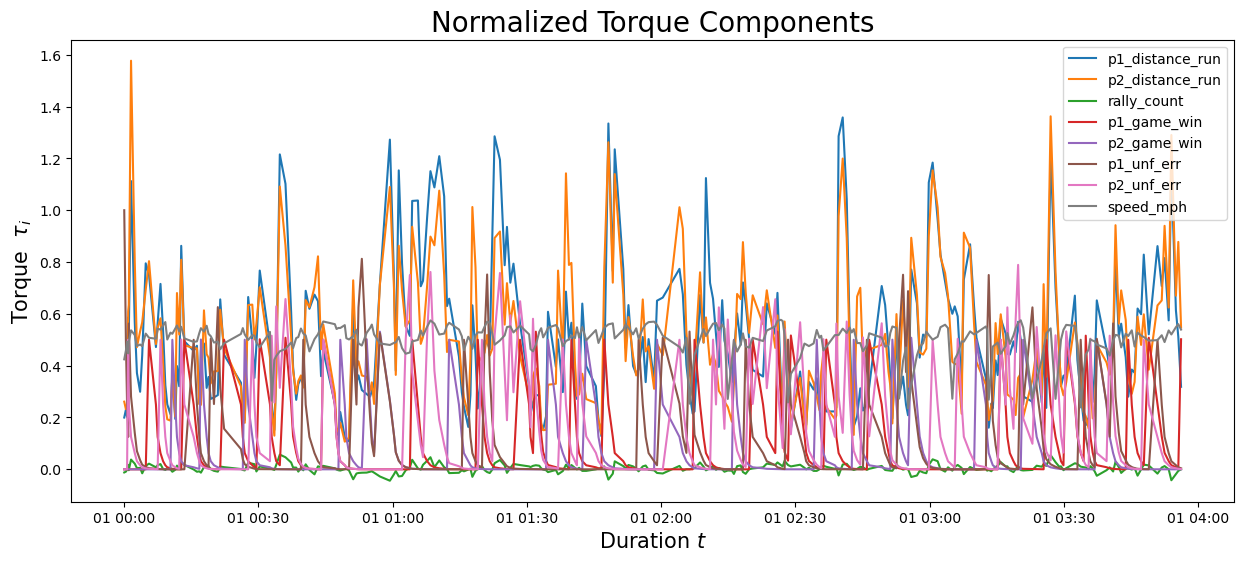

In [5]:
unit = tr.ModelUnit("Carlos Alcaraz", "Nicolas Jarry", data)

unit.preprocess()
unit.prefilter()
unit.show_components()

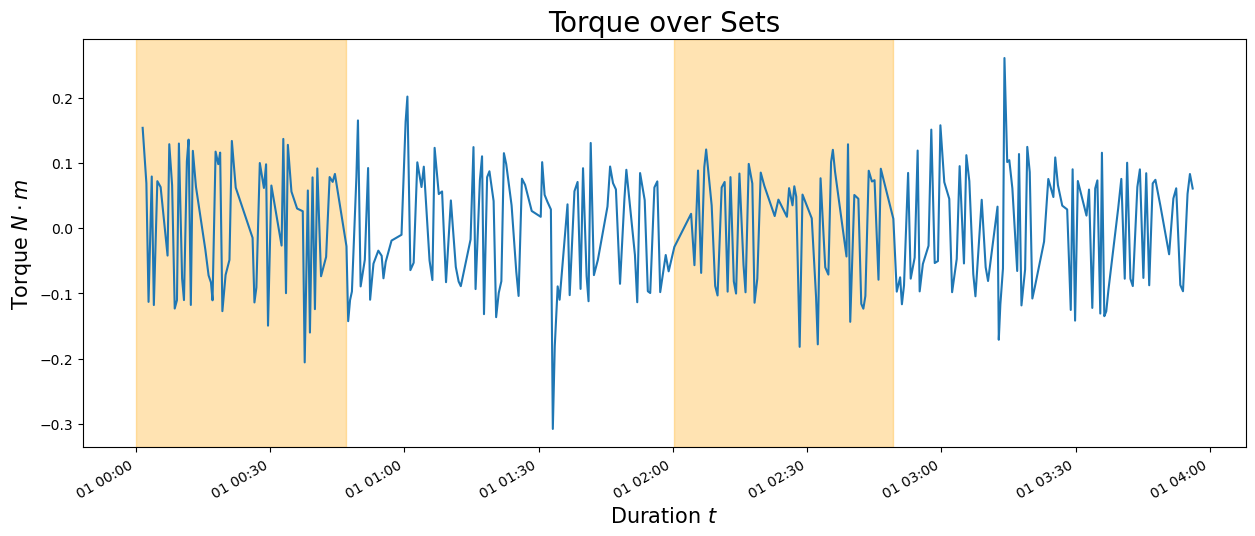

In [6]:
unit.calc_torque(players["Inertia"])
unit.show_calculated_torque()

Slope (Coefficient): [ 0.09462649 -0.00148192  0.06123312 -0.12036322 -0.04631359 -0.06126346
  0.11029836  0.15590847  0.0391591 ]
Intercept: -0.1028987692064354


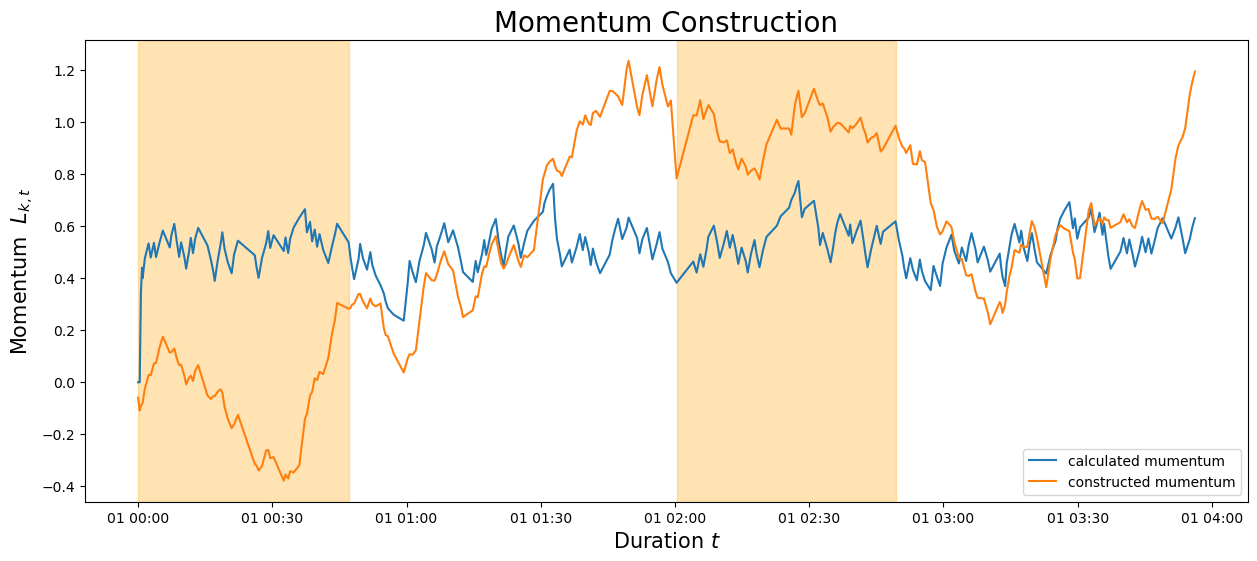

In [7]:
inputs = ['p1_win', "p1_distance_run",  'p1_game_win','p2_game_win', 'p1_score_diff', 'p1_unf_err', 'p2_unf_err', "p1_ser_sp", 'p1_ser']

unit.train(inputs)
unit.construct_momentum()

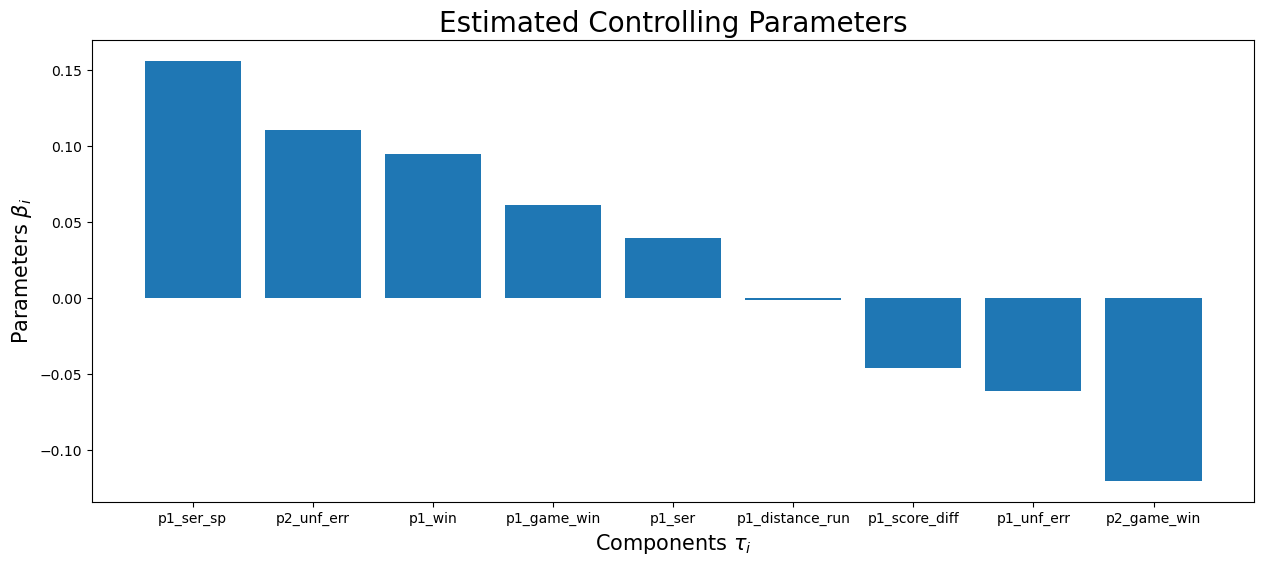

In [8]:
unit.show_params(True)

# Other Training Set

Slope (Coefficient): [ 0.09462649 -0.00148192  0.06123312 -0.12036322 -0.04631359 -0.06126346
  0.11029836  0.15590847  0.0391591 ]
Intercept: -0.1028987692064354
Slope (Coefficient): [ 0.03798921 -0.00429698  0.18645822 -0.02381427 -0.03109594 -0.07204792
  0.07258677  0.17953175  0.09127433]
Intercept: -0.10982954905977742
Slope (Coefficient): [-0.46668682  0.02201072  0.38594443 -0.03898703  0.02502287 -0.09095291
 -0.06828323  0.32846332 -0.13606726]
Intercept: 0.13899773772919322


/home/yz812/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Slope (Coefficient): [ 0.31400855  0.02048861 -0.01698426 -0.04697078 -0.04308878 -0.09651076
  0.08465835  0.10841361  0.05845112]
Intercept: -0.2141272808446905


/home/yz812/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Slope (Coefficient): [ 0.19285667  0.03205377  0.14469326 -0.01798165 -0.0500477  -0.04222286
  0.09230119  0.13159694  0.06855442]
Intercept: -0.20561206759394773
Slope (Coefficient): [ 0.04656156 -0.016029    0.05131574 -0.1205122  -0.03306611 -0.12360384
  0.18493381  0.27078623 -0.02594728]
Intercept: -0.05582342497636818
Slope (Coefficient): [ 0.09751559 -0.01278281  0.06237428  0.0182343  -0.011248   -0.09989047
  0.22170994  0.19935533 -0.01254664]
Intercept: -0.10496390172207751
Slope (Coefficient): [ 0.18919065  0.00570632  0.00520163 -0.05546417 -0.02694699 -0.06686913
  0.20086531  0.21554484  0.03182291]
Intercept: -0.16094351445135974


/home/yz812/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yz812/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)


Slope (Coefficient): [ 0.25516253 -0.01736566  0.09148515 -0.00995648 -0.03909373 -0.25220236
  0.0946918  -0.24776717  0.26046404]
Intercept: -0.16640869851989193
Slope (Coefficient): [ 0.21772413  0.02310379 -0.01020814  0.04232603 -0.01869117 -0.03308043
  0.08271098  0.          0.05168499]
Intercept: -0.15793703625595507


/home/yz812/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)
/data1/yz812/mcm/utils/train.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 6))


Slope (Coefficient): [ 0.07384475 -0.07773238 -0.10820079 -0.2833255  -0.04263209 -0.23373451
  0.23875017  0.          0.14419584]
Intercept: -0.032020558548260324
Slope (Coefficient): [ 0.03719273 -0.05305769  0.13224689 -0.10463545 -0.03381914 -0.13368516
  0.1407838   0.15718033 -0.01638474]
Intercept: -0.005194695040339356


/home/yz812/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Slope (Coefficient): [ 0.32743797  0.03535236 -0.01013762  0.03239177 -0.03385423 -0.12908686
 -0.00556624  0.17150875 -0.00804511]
Intercept: -0.21363524339856663
Slope (Coefficient): [ 0.03069307  0.09349743  0.08889551 -0.167968   -0.03986639 -0.15583906
  0.26228315  0.11124437  0.14819344]
Intercept: -0.17939930894177591
Slope (Coefficient): [ 0.2367862  -0.03864433  0.05064663 -0.11920389 -0.04996089 -0.16693471
  0.05229457  0.05513842  0.13014684]
Intercept: -0.15417443455383922
Slope (Coefficient): [ 0.29953629  0.00223711 -0.06912832 -0.06401586 -0.0409539  -0.08833212
  0.1006215   0.17238695  0.02775261]
Intercept: -0.18998293685943987


/home/yz812/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yz812/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Slope (Coefficient): [ 0.2229159   0.02442949  0.06303222 -0.07917545 -0.03649137 -0.10832416
  0.06986997  0.13755427  0.03864013]
Intercept: -0.17707084562857772
Slope (Coefficient): [ 0.24276381 -0.02434469  0.02197829 -0.0139565  -0.02695193 -0.03041026
  0.0958745   0.21805533 -0.00401608]
Intercept: -0.17528884461718708
Slope (Coefficient): [-0.8752762  -0.05019245  0.16746468 -0.56505154 -0.04054595 -0.4900437
  0.46963762  0.32994735  0.13188042]
Intercept: 0.39205842313844047


/home/yz812/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Slope (Coefficient): [ 0.1386923  -0.02381865 -0.10637875 -0.08041294 -0.00914576 -0.08153828
  0.09156208  0.31606645 -0.02609689]
Intercept: -0.09177683160279715
Slope (Coefficient): [-0.38586618  0.01436935  0.13612548 -0.5704295  -0.06276149 -0.3041963
  0.04788815  0.97198886 -0.31002842]
Intercept: 0.22902786205334713
Slope (Coefficient): [ 0.08131149 -0.0029703   0.10842608 -0.14289692 -0.03459107 -0.06559344
  0.0855611   0.07255705  0.0833377 ]
Intercept: -0.098999301240497
Slope (Coefficient): [ 0.38465985  0.04216197  0.01085474 -0.03462291 -0.04600812 -0.10386695
  0.08080245  0.13829894  0.12068343]
Intercept: -0.31286648885281604


/home/yz812/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Slope (Coefficient): [ 0.2373941  -0.05128504  0.28730461  0.0574892  -0.0670541   0.00388532
  0.18154479  0.1211179   0.14252296]
Intercept: -0.25582089567848676


/home/yz812/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Slope (Coefficient): [ 0.23795316 -0.01523414  0.0356338  -0.06696485 -0.02983828 -0.13219782
  0.05591493  0.20521876  0.02278494]
Intercept: -0.1760969241832346
Slope (Coefficient): [-1.52738146e-01 -1.14762519e-04  6.79146810e-02 -2.25239274e-01
 -3.48387992e-02 -3.87681923e-01  2.79844225e-01  8.32414672e-02
  1.56936114e-01]
Intercept: 0.005053667039472978
Slope (Coefficient): [ 0.09185467  0.03466535  0.06539971 -0.03998045 -0.02803874 -0.11336462
  0.10057854  0.20711797 -0.01438901]
Intercept: -0.10945625236211354
Slope (Coefficient): [ 0.12255207 -0.05059245  0.01110604 -0.11769445 -0.03387395 -0.10960311
  0.11184069  0.2581417  -0.02509139]
Intercept: -0.06618223915289392
Slope (Coefficient): [ 0.12997562  0.00019236  0.07721005 -0.04504753 -0.02795687 -0.12201389
  0.08479757  0.06247619  0.04165996]
Intercept: -0.111668990447678
Slope (Coefficient): [ 0.13738466  0.04405438  0.02636071 -0.04800087 -0.02668038 -0.1075096
  0.11136441  0.07628552  0.0328372 ]
Intercept: -0.1

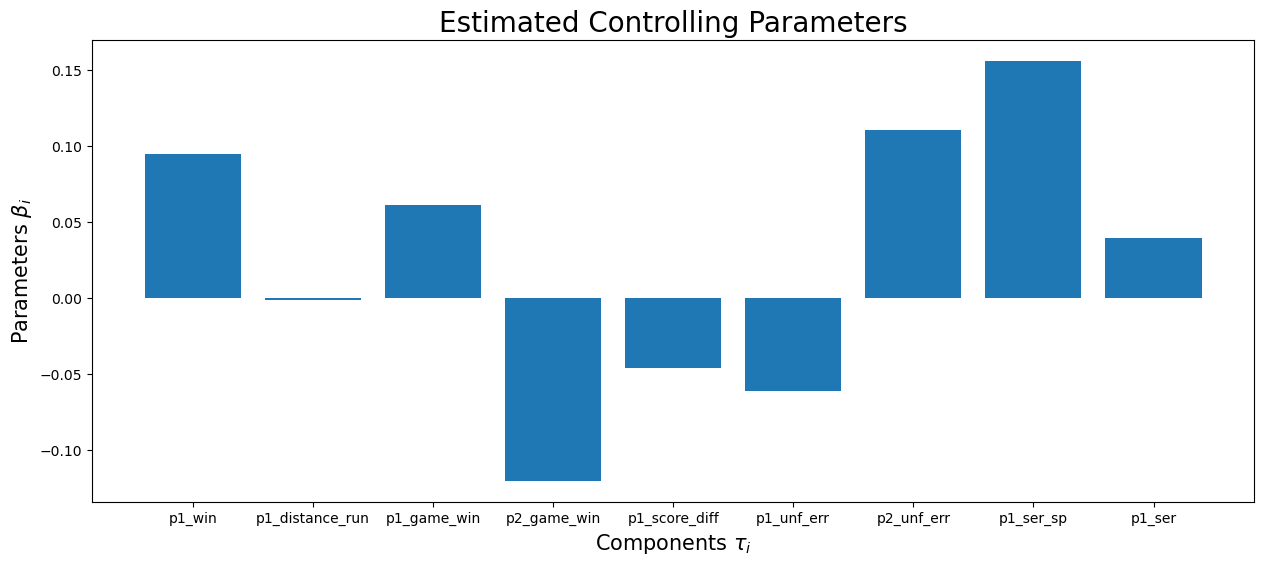

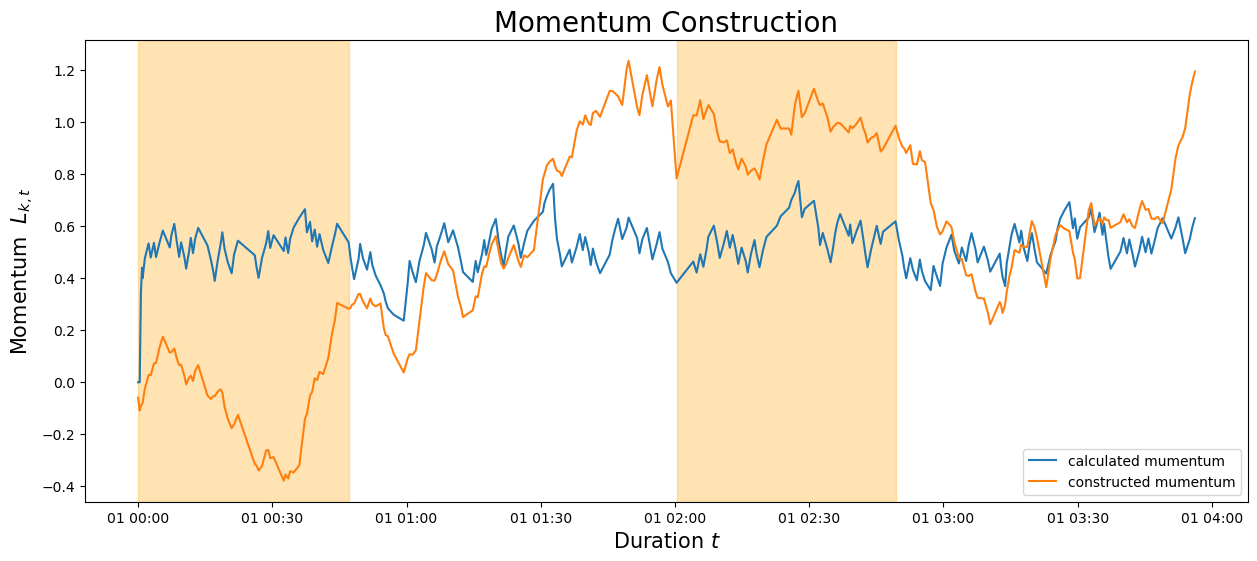

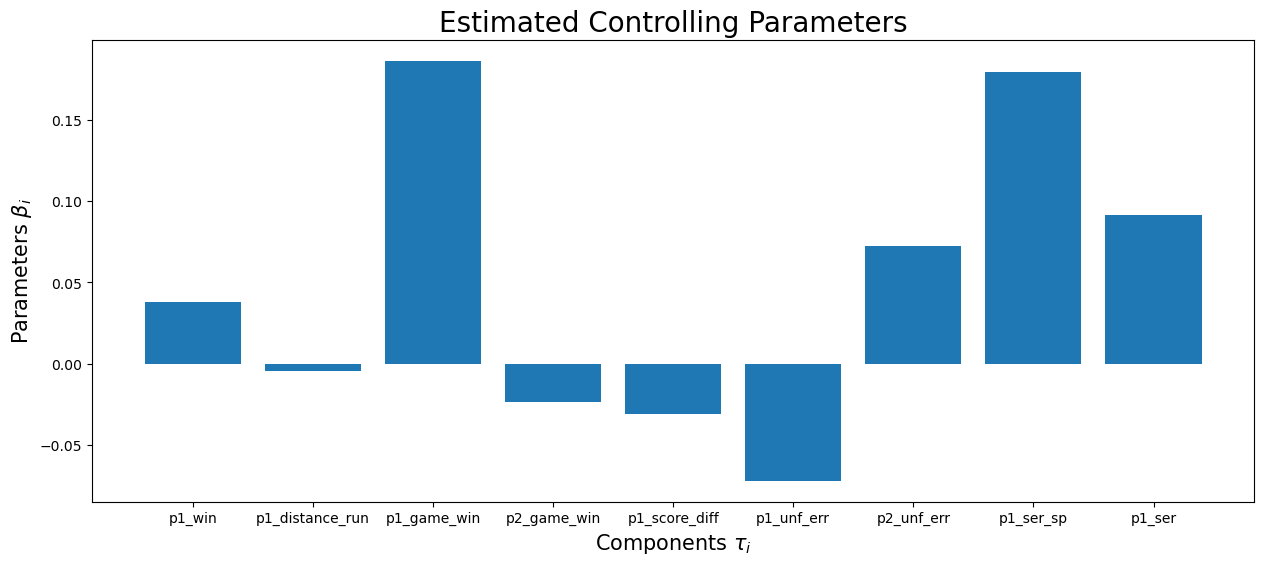

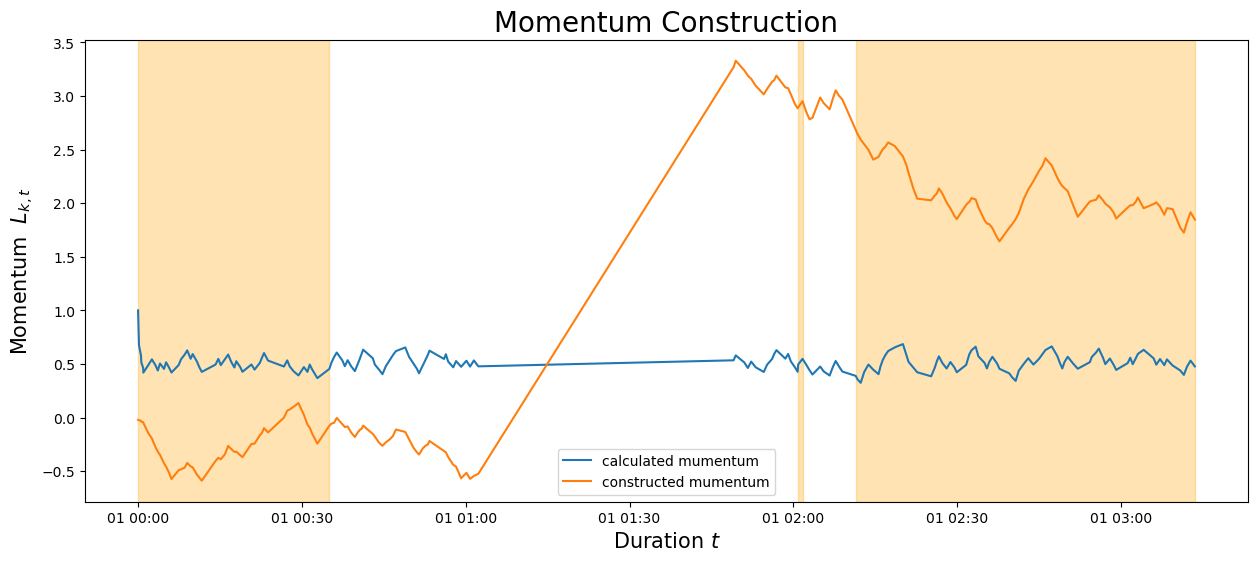

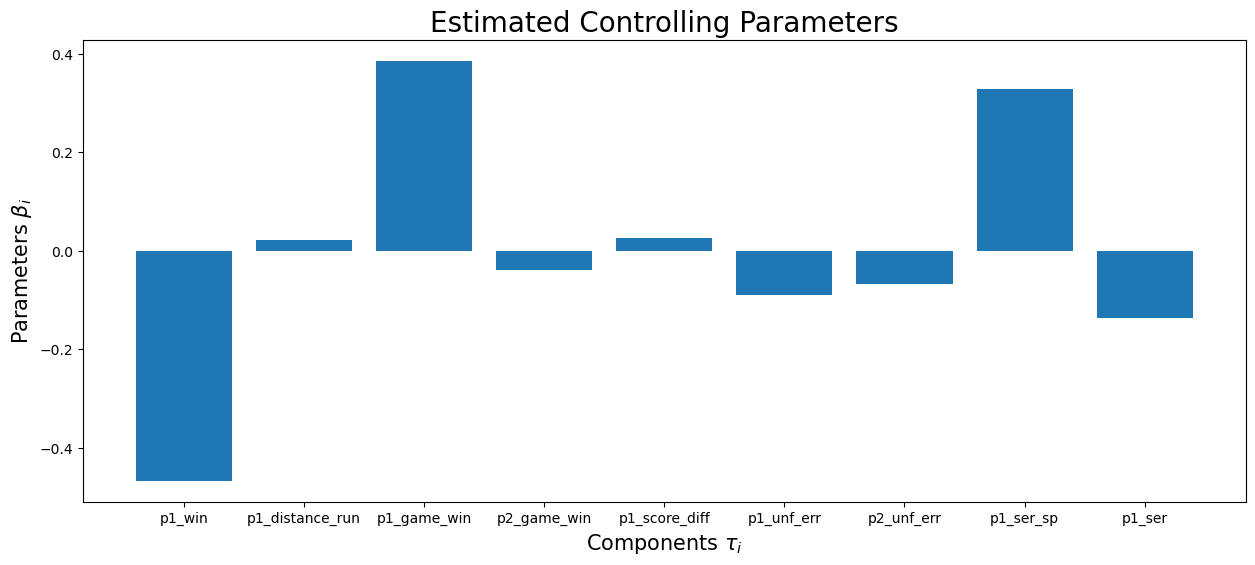

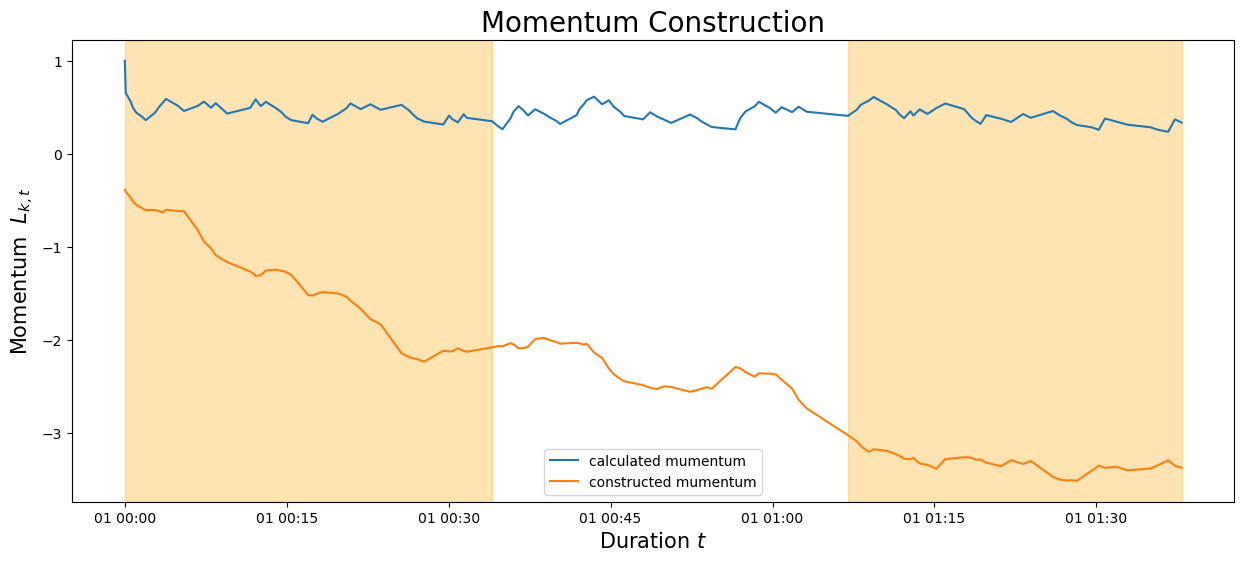

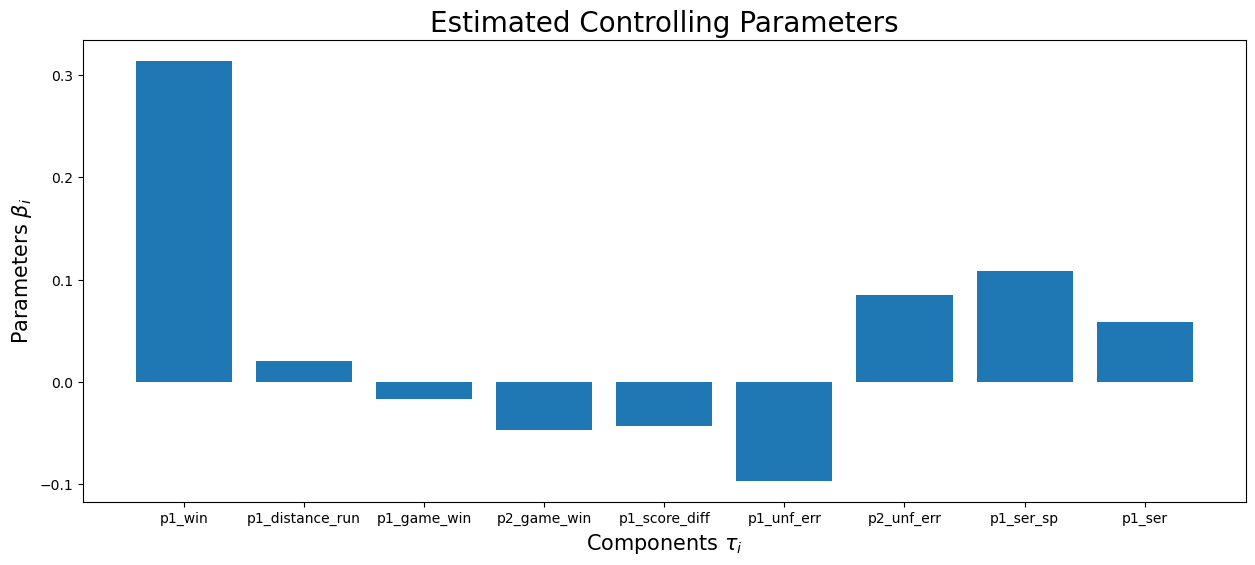

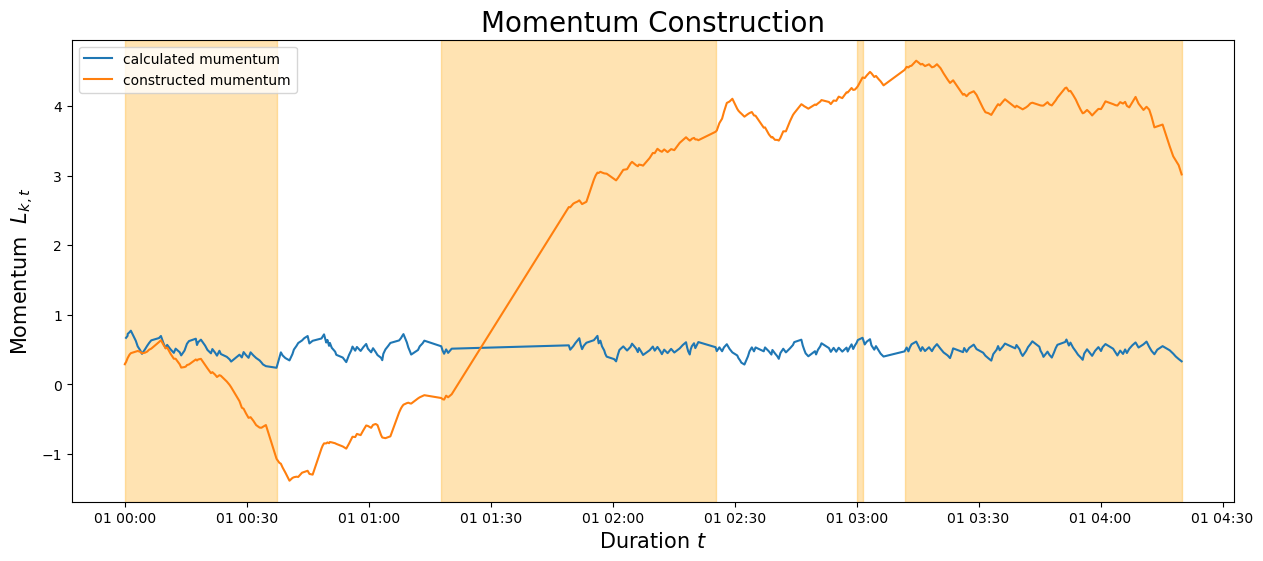

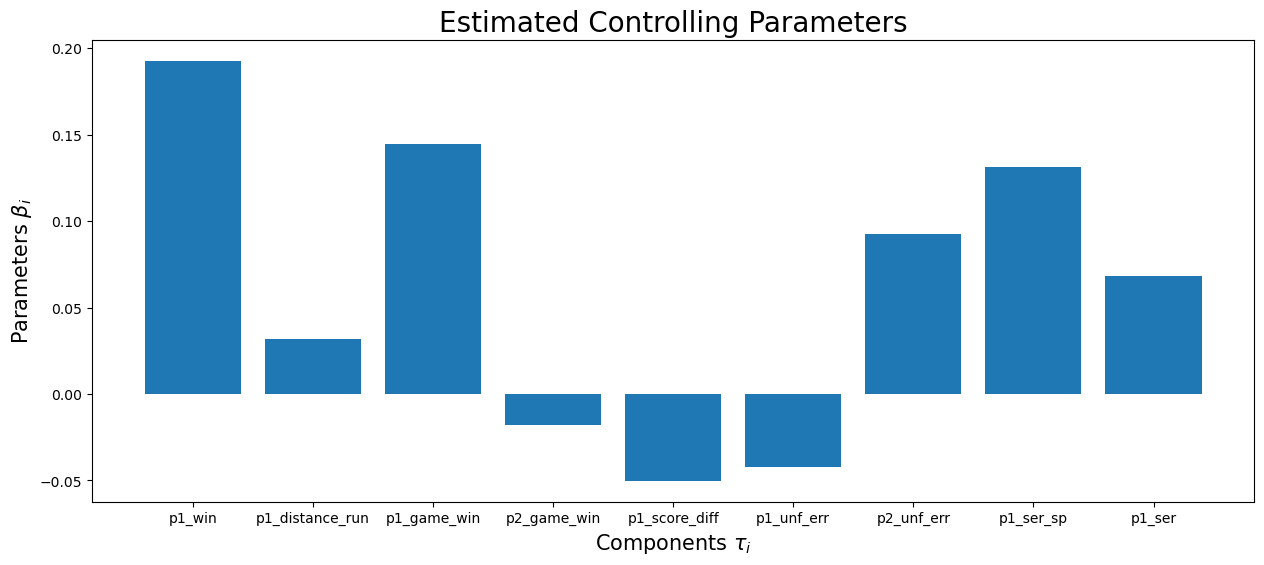

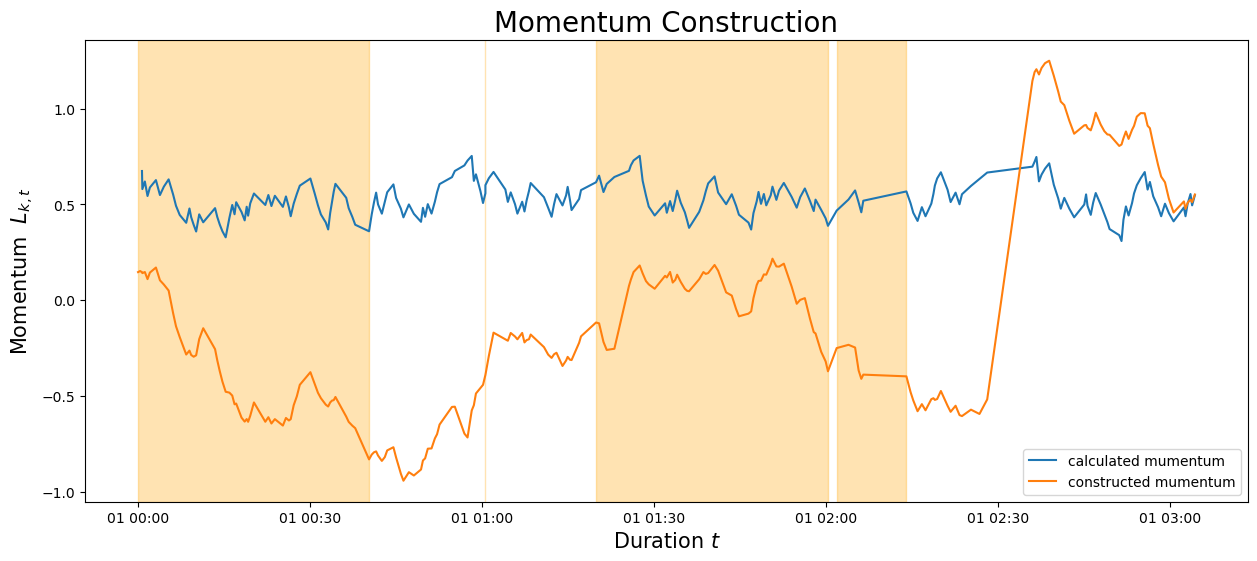

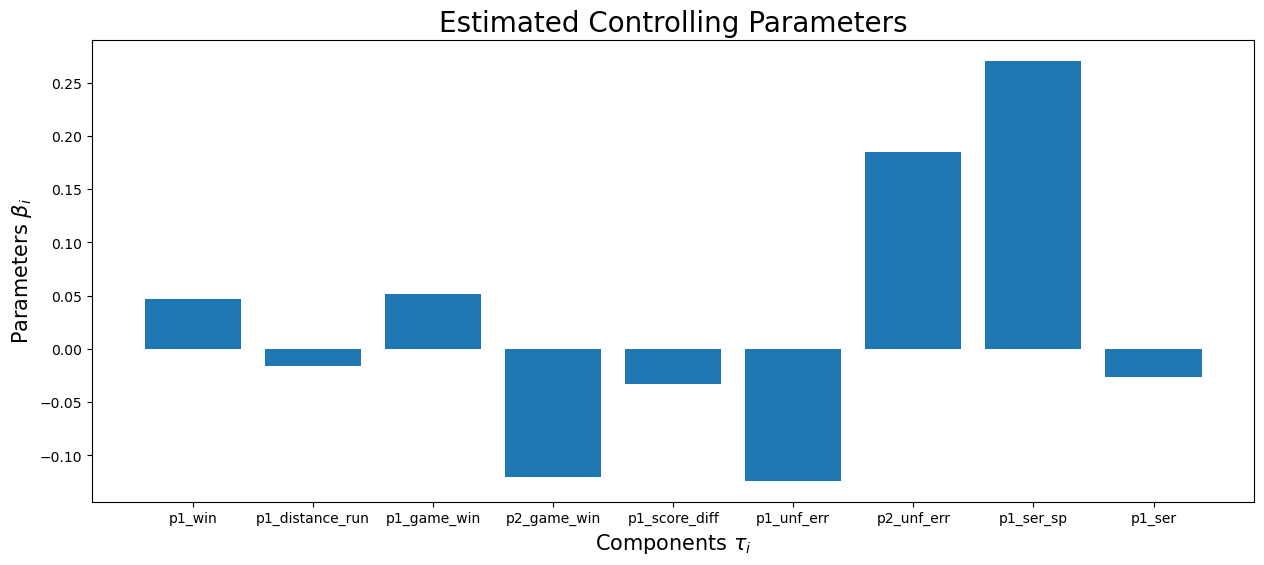

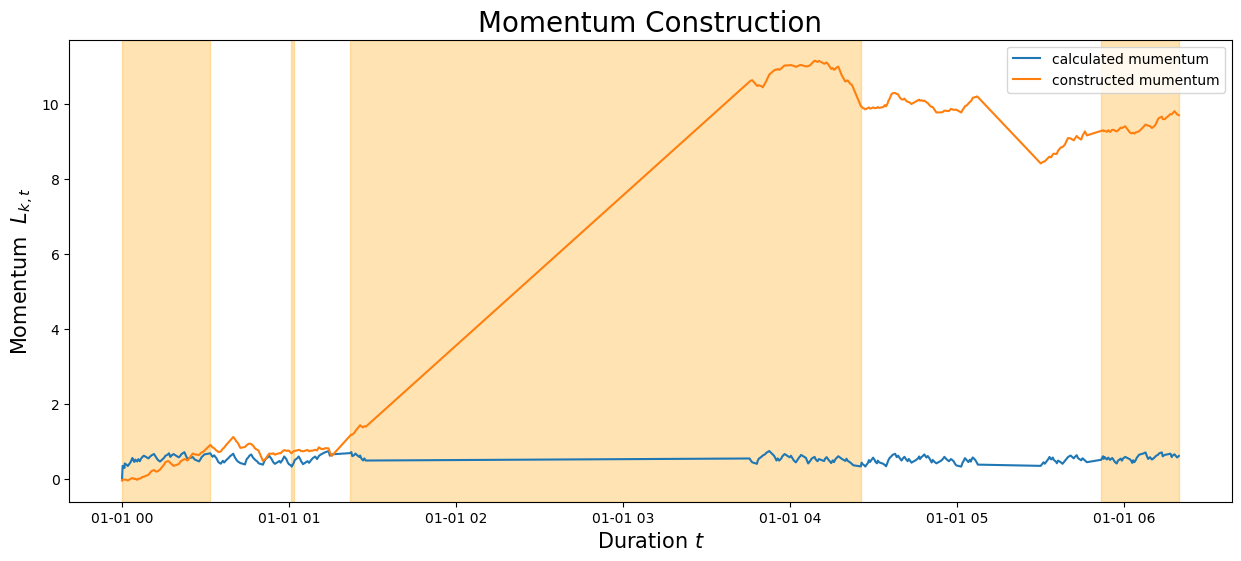

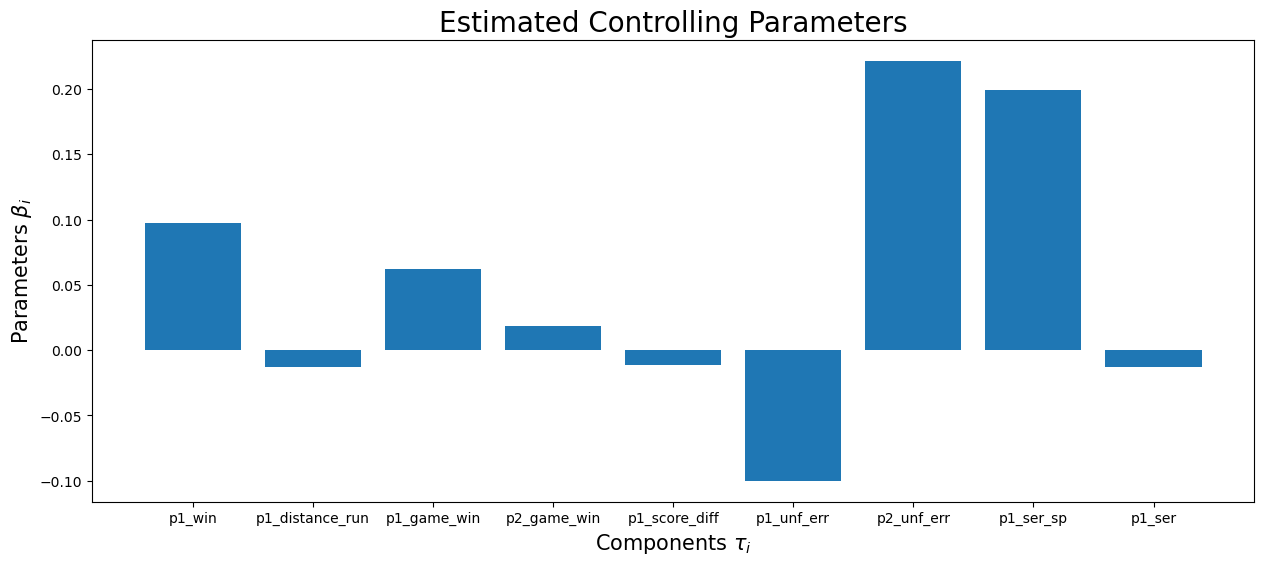

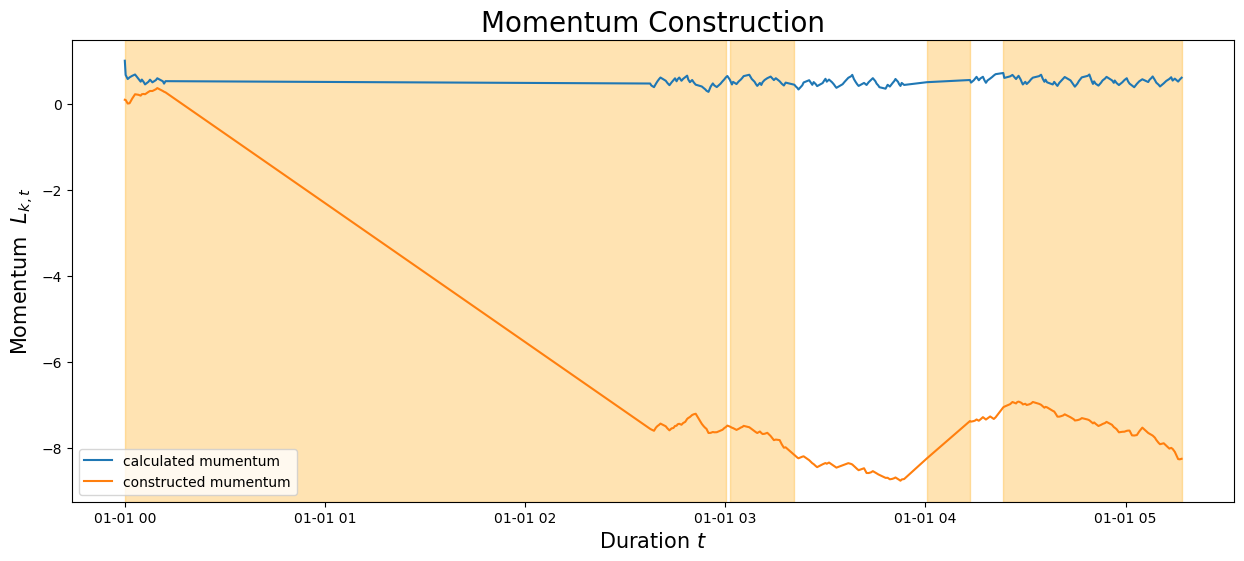

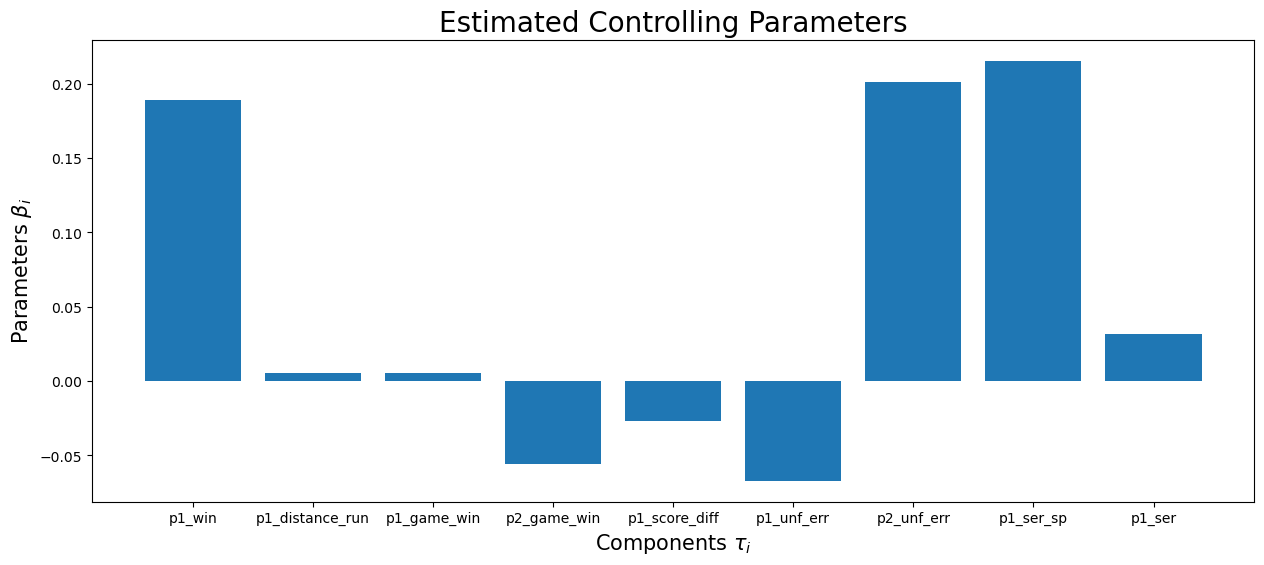

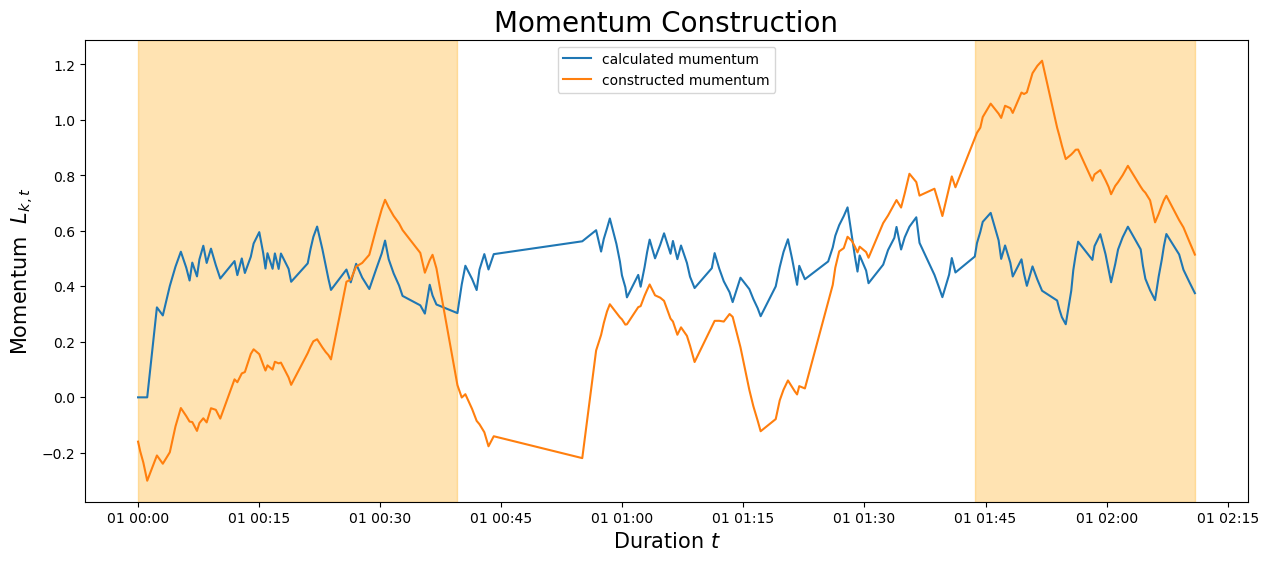

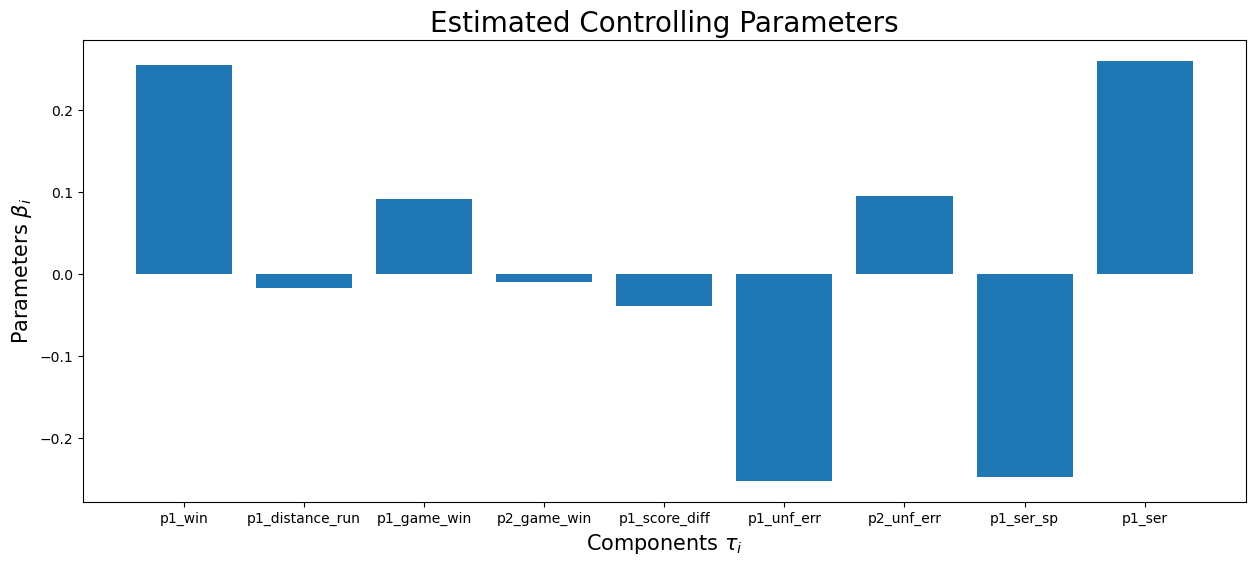

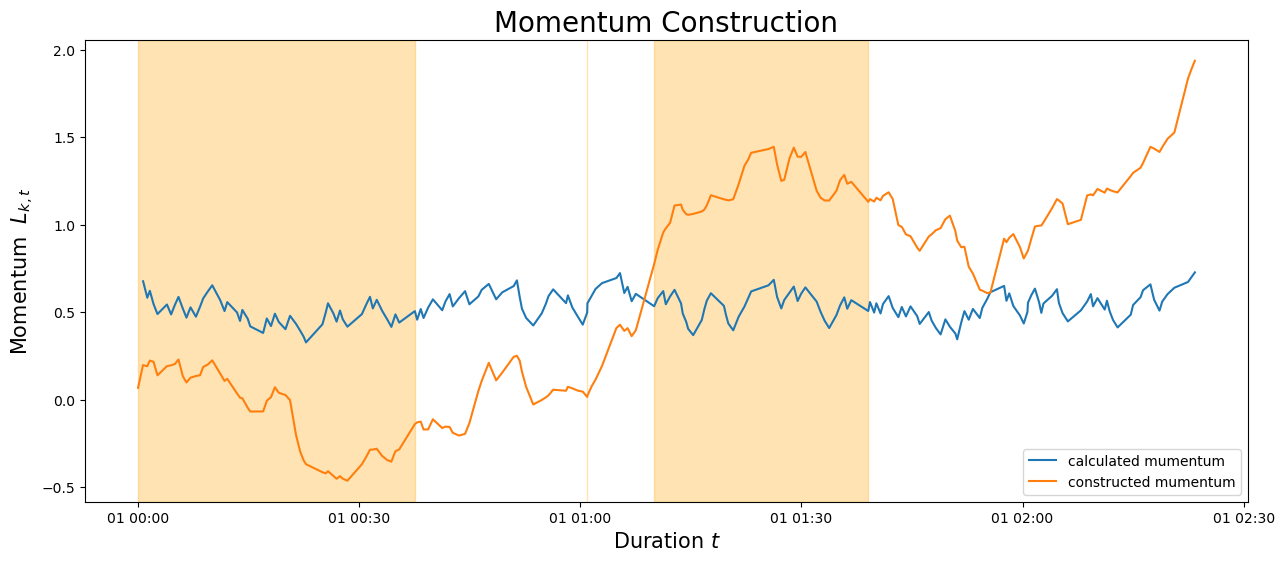

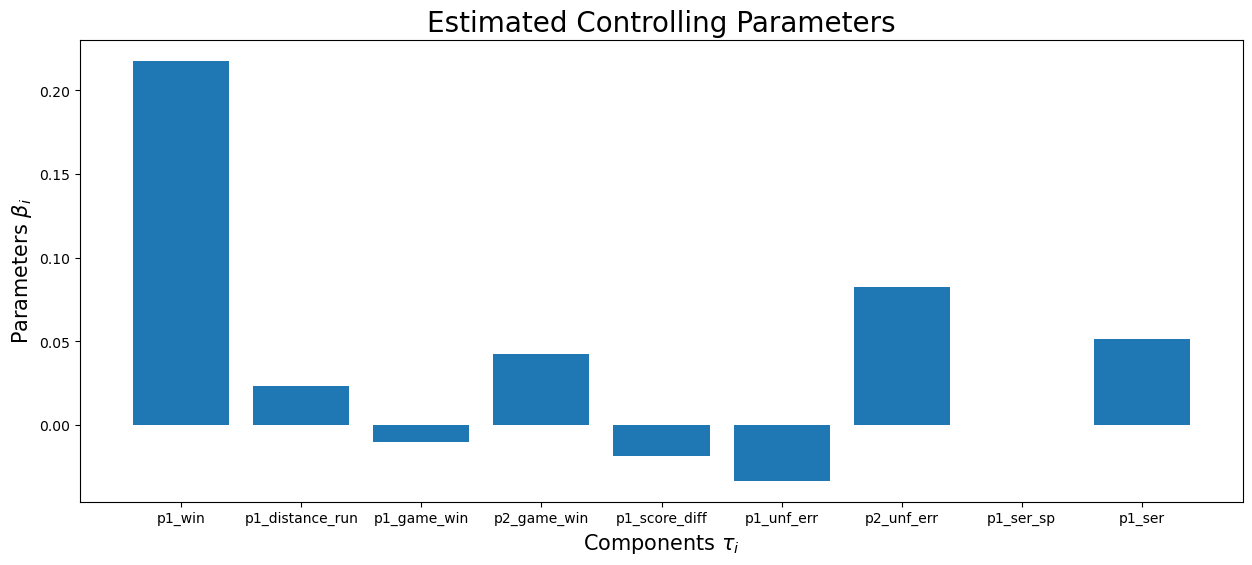

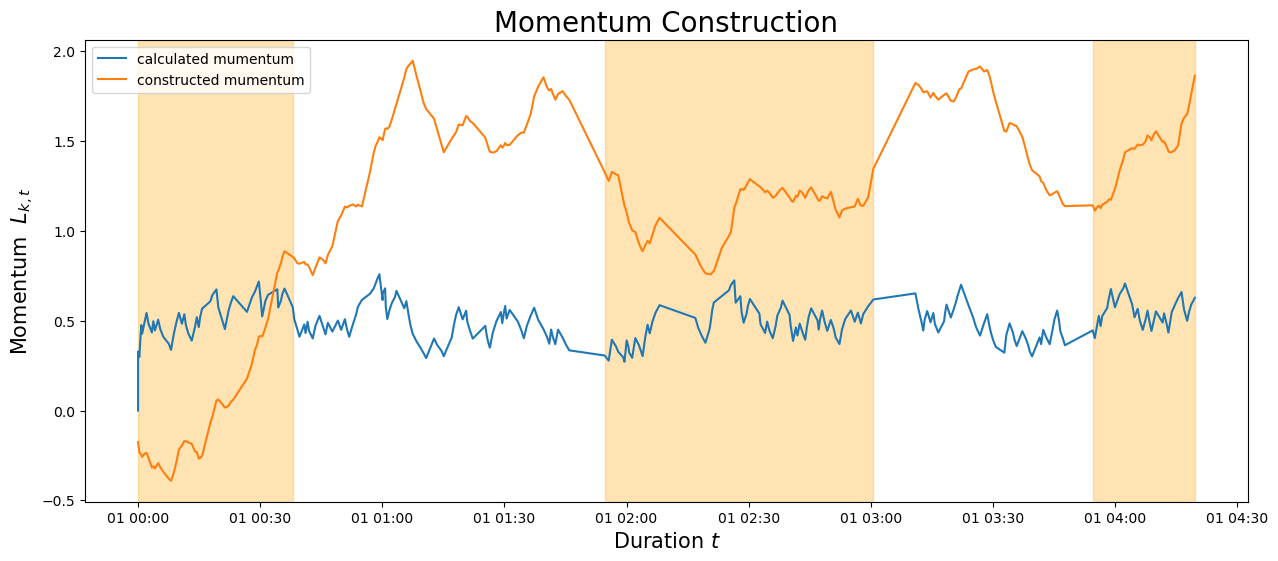

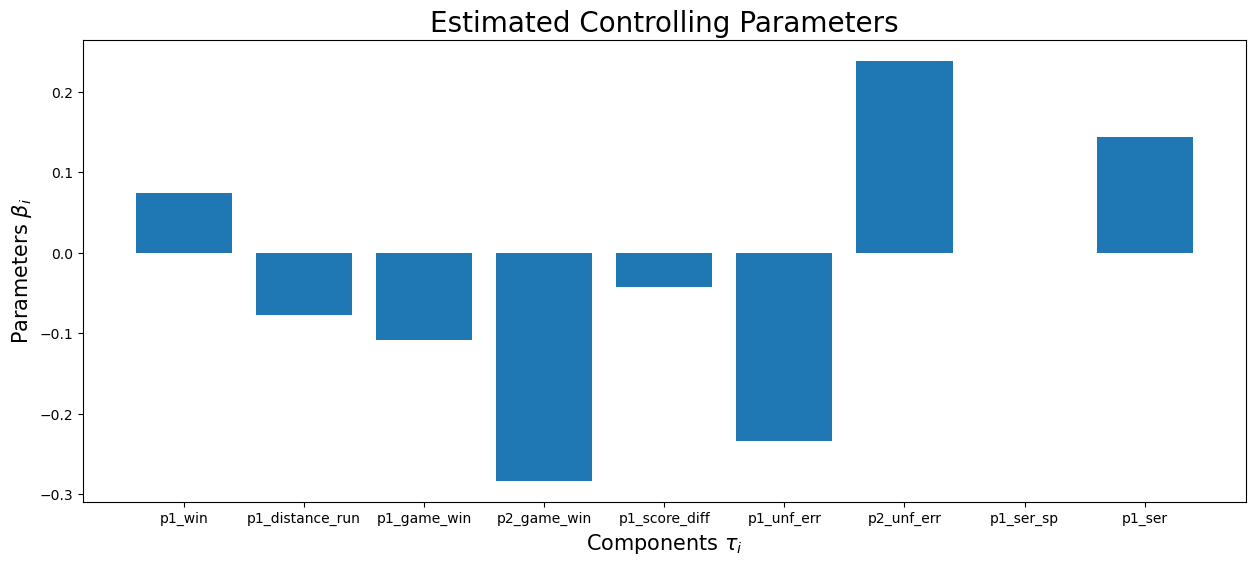

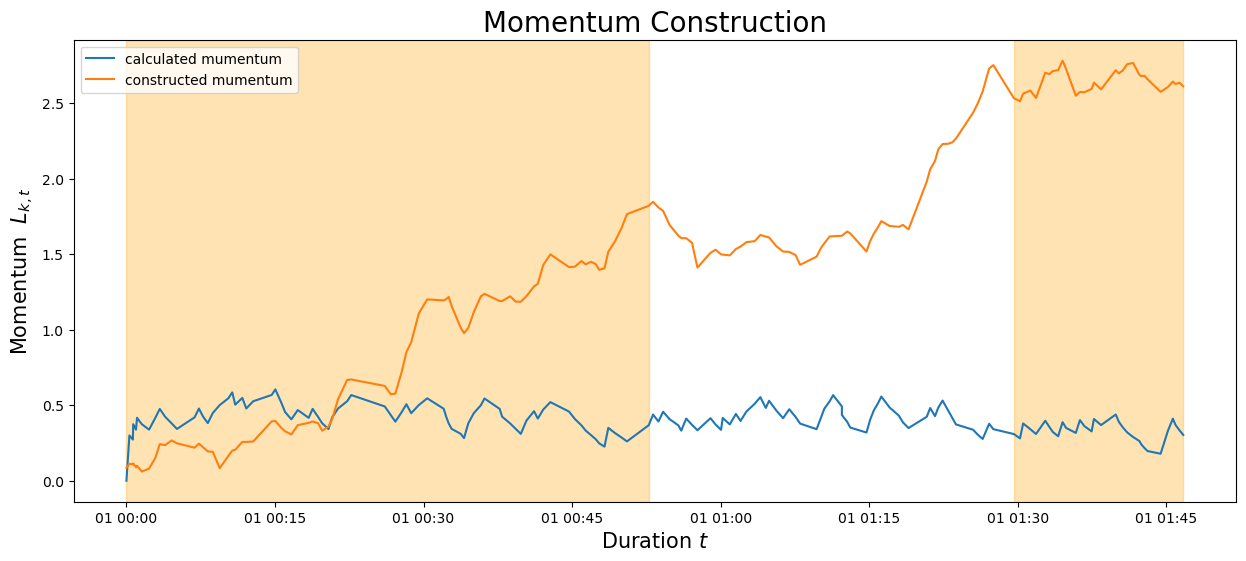

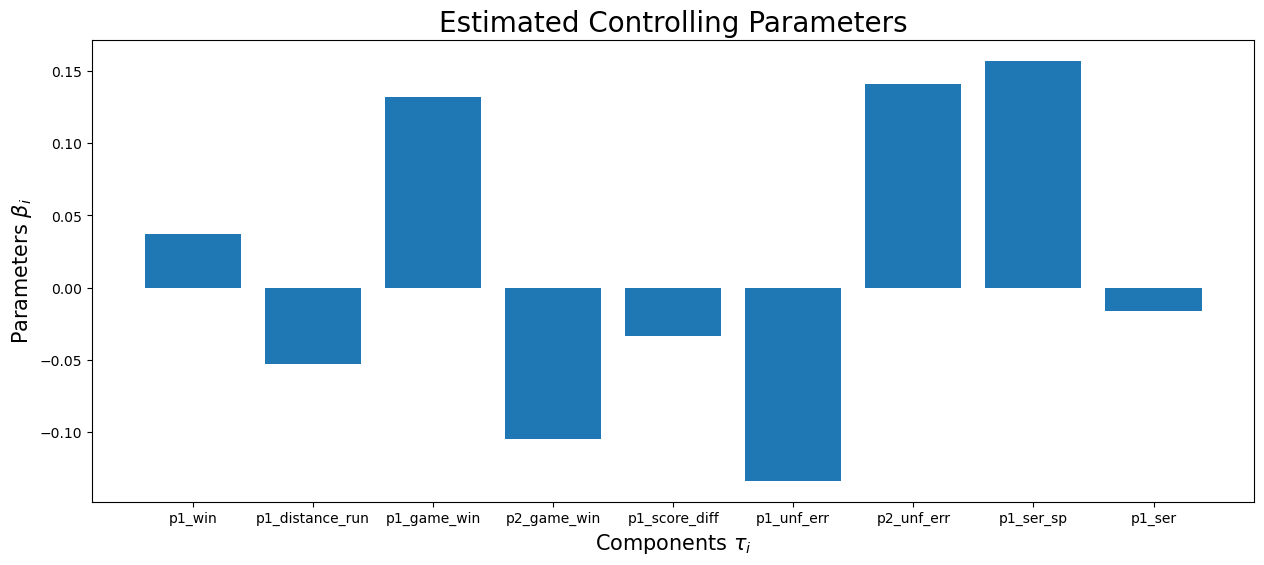

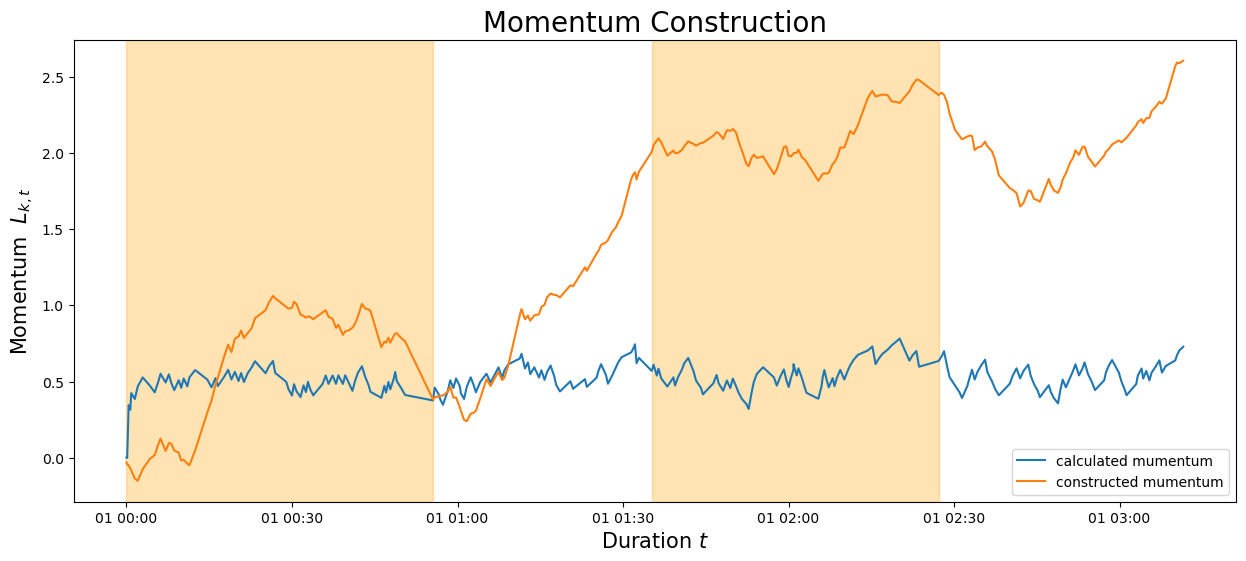

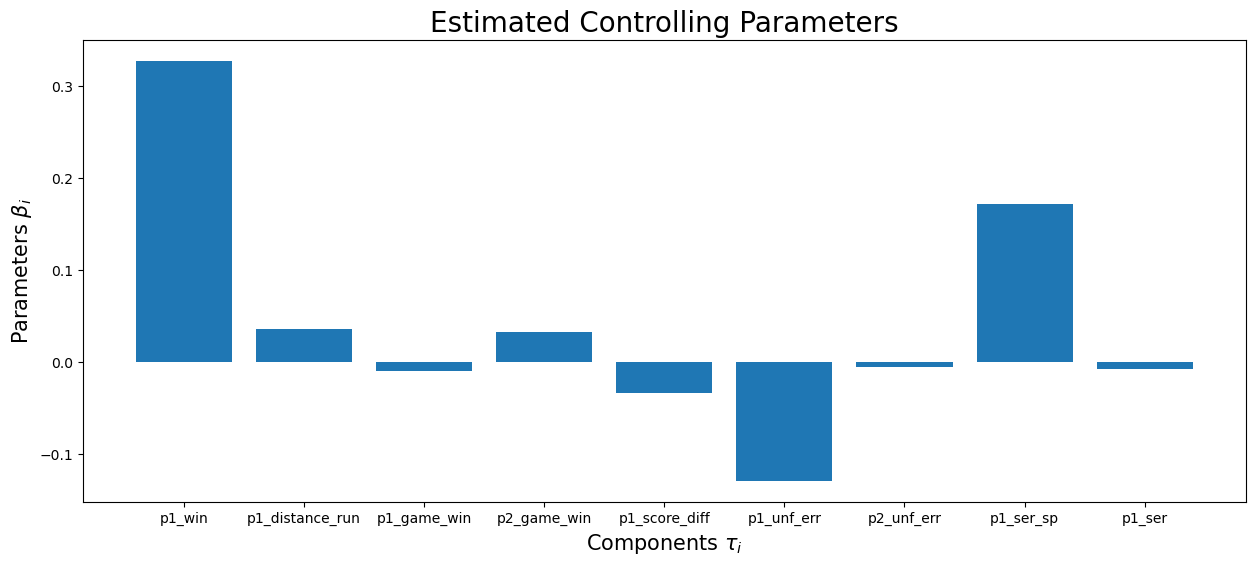

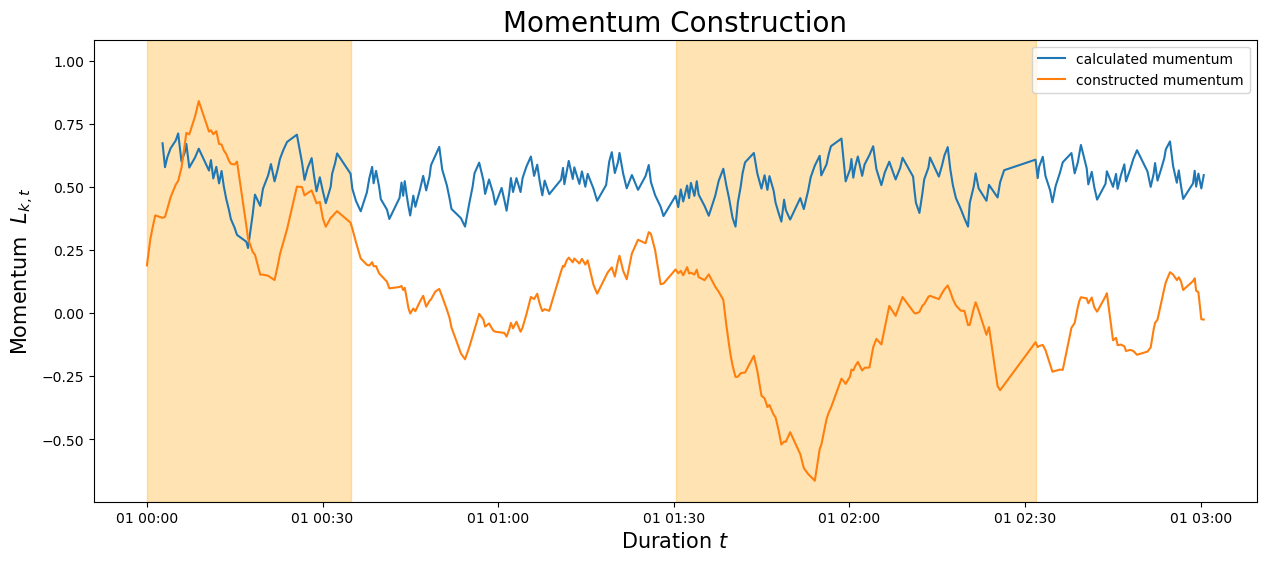

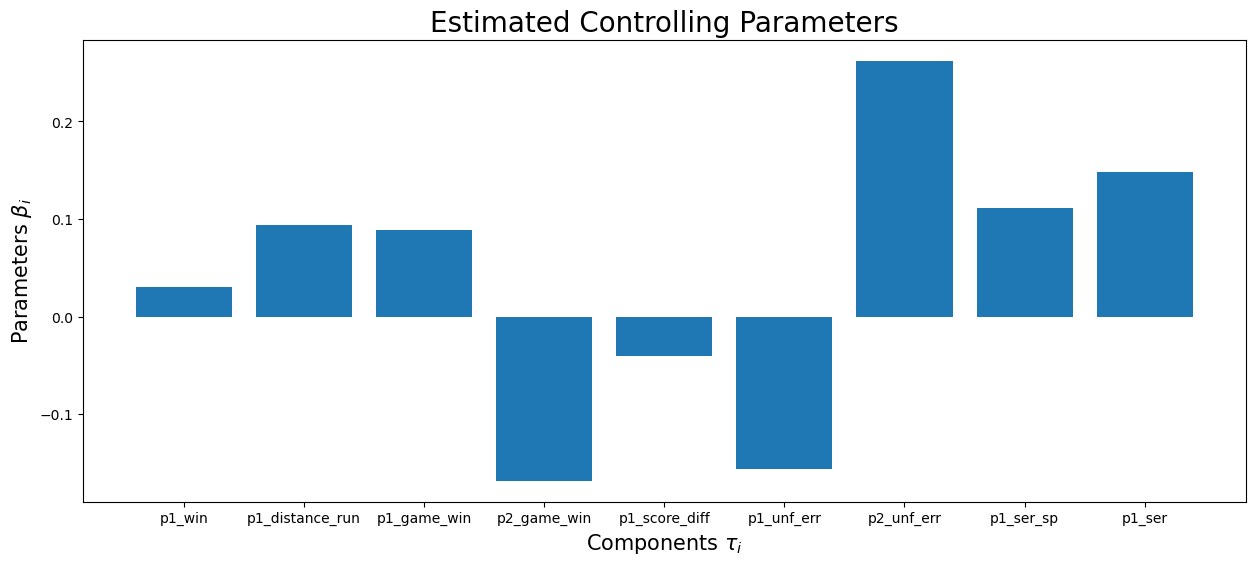

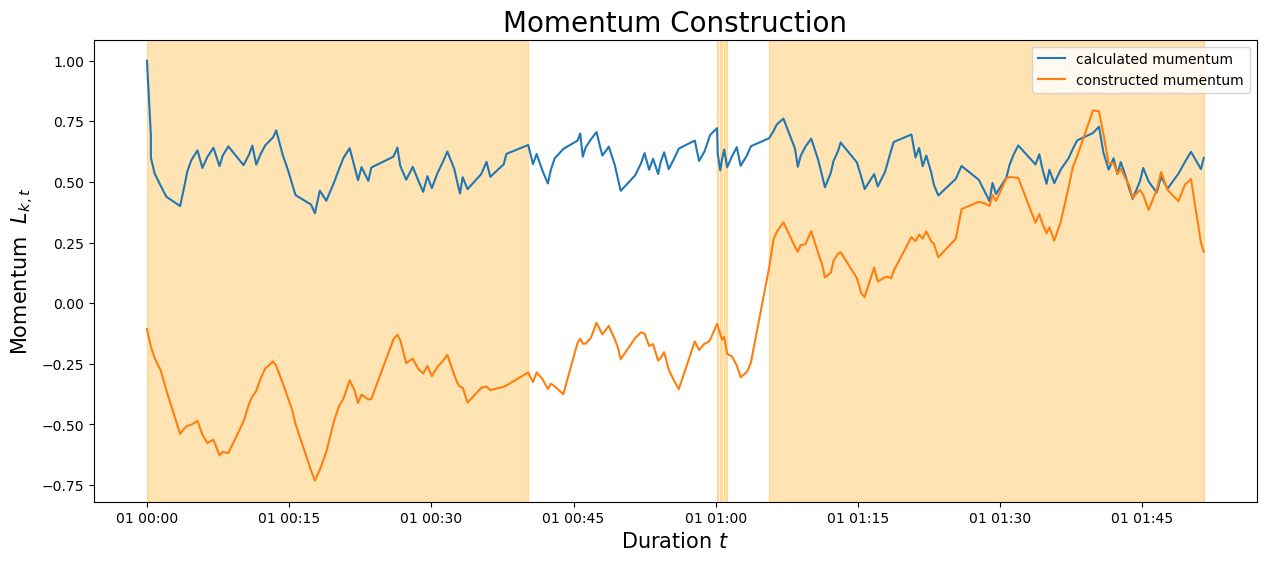

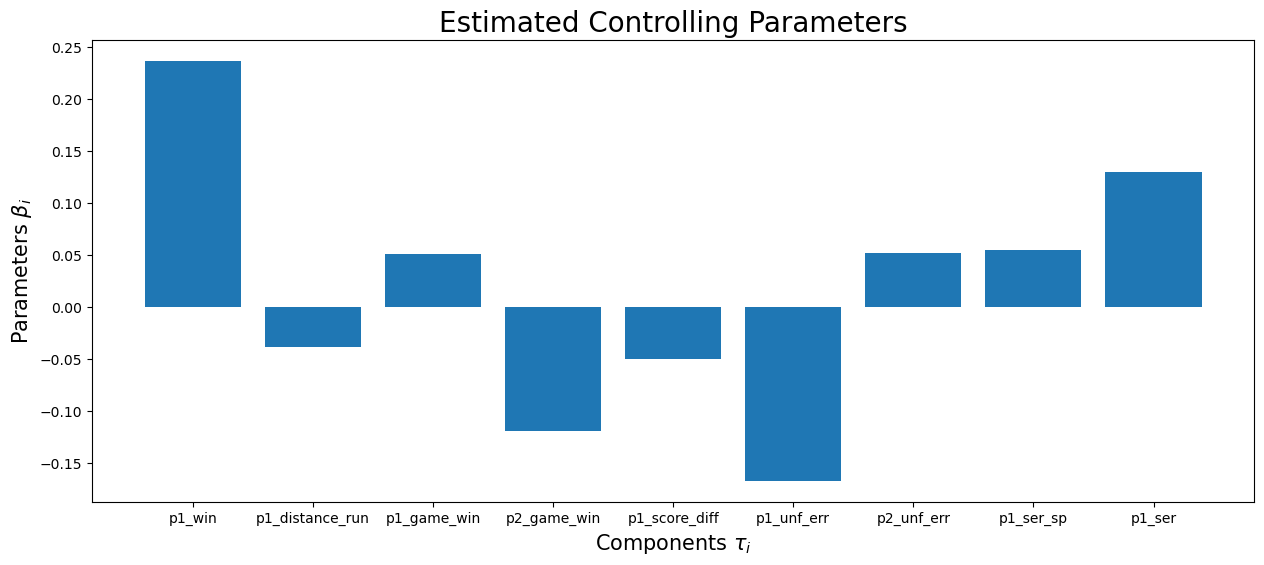

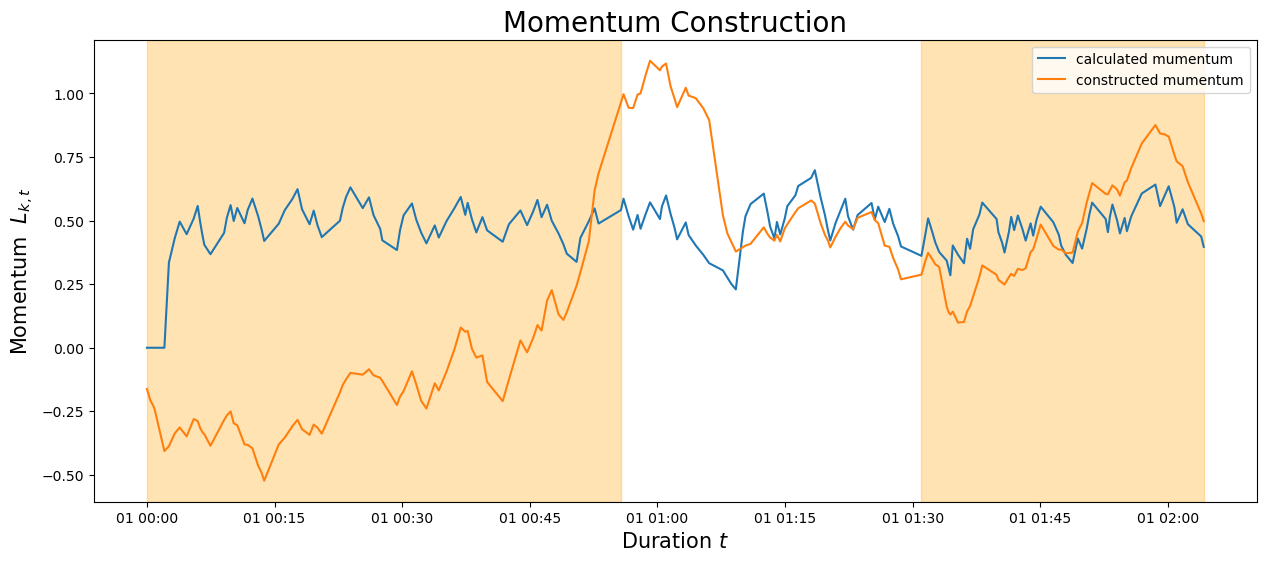

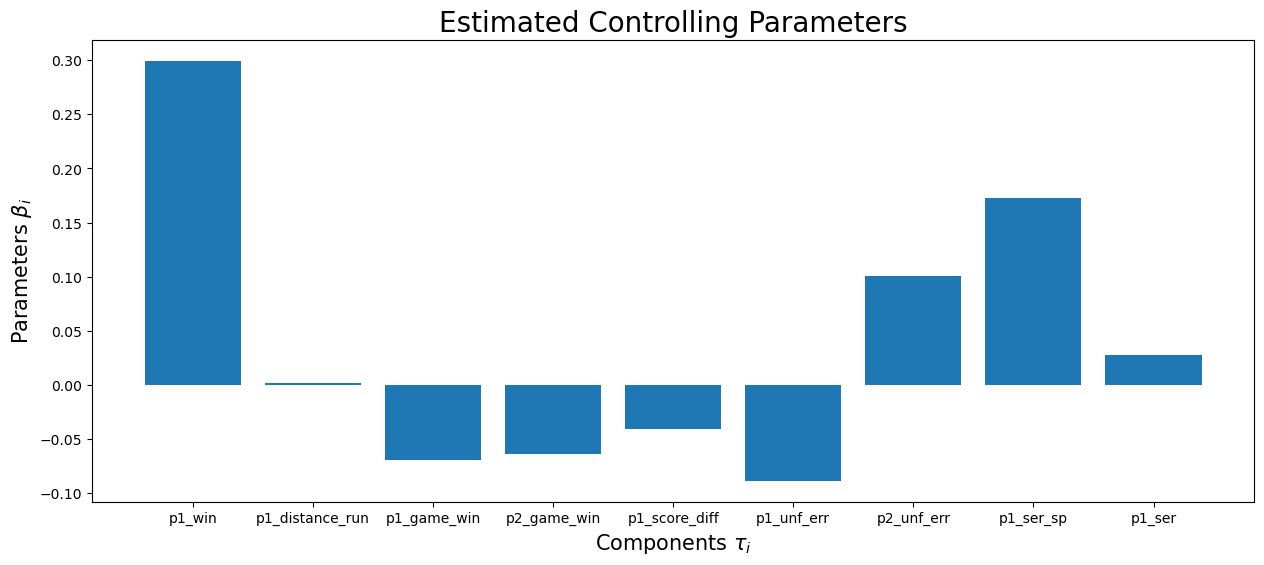

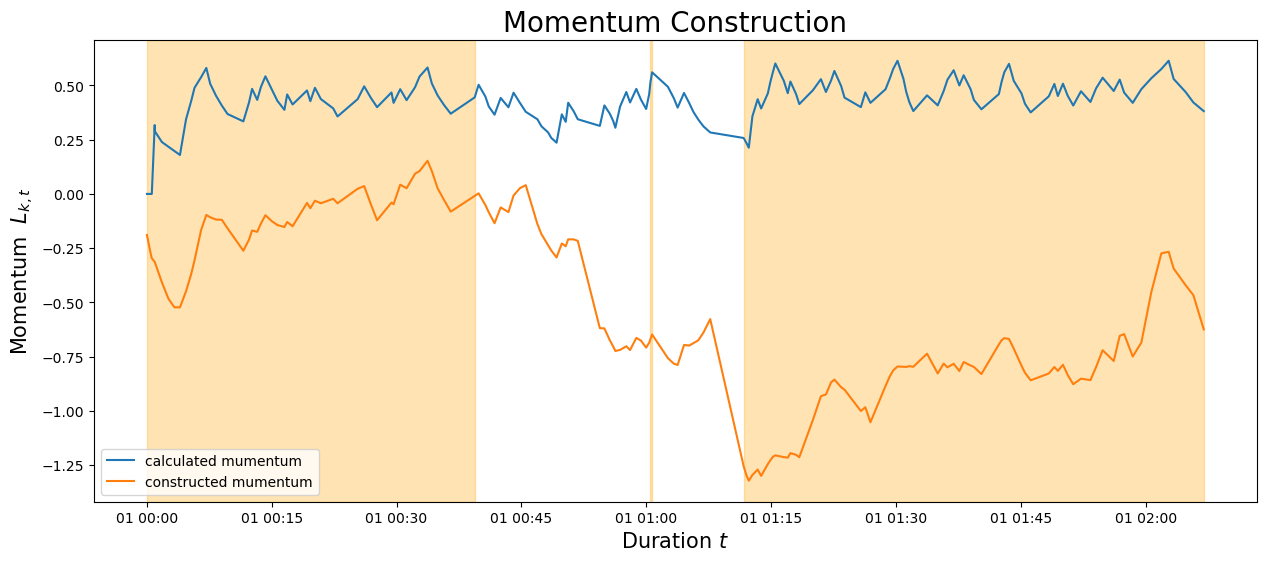

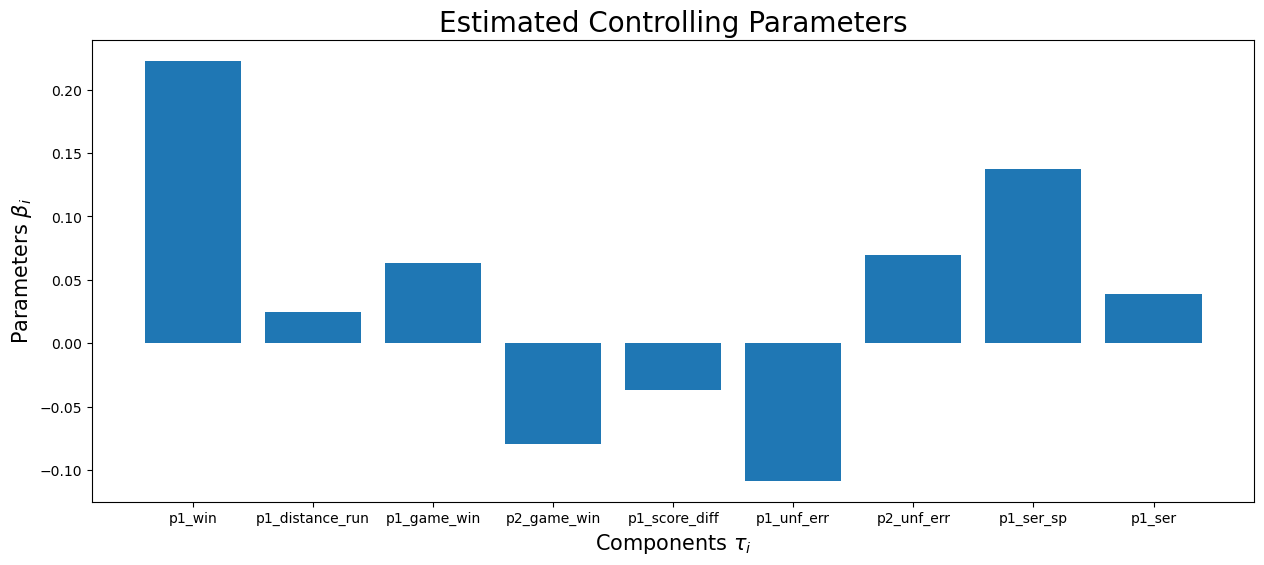

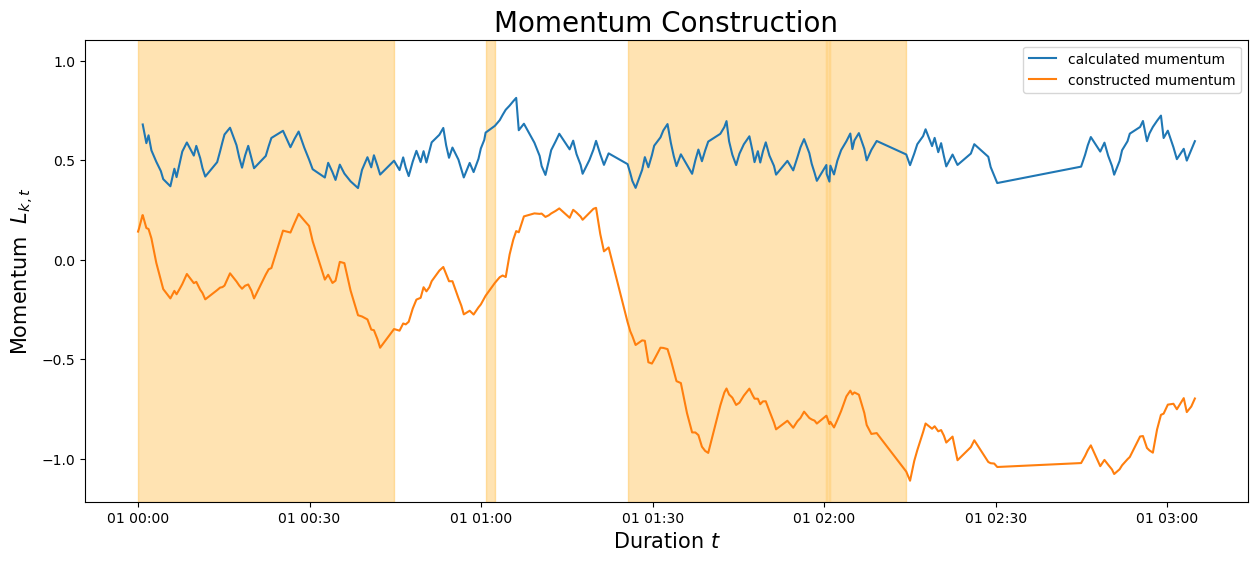

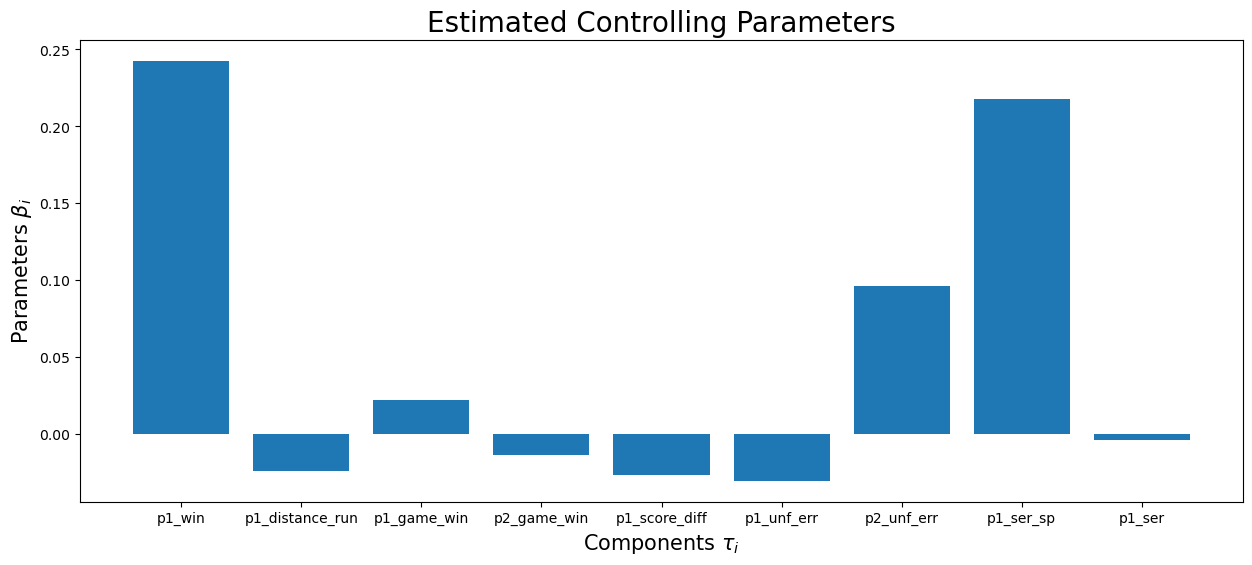

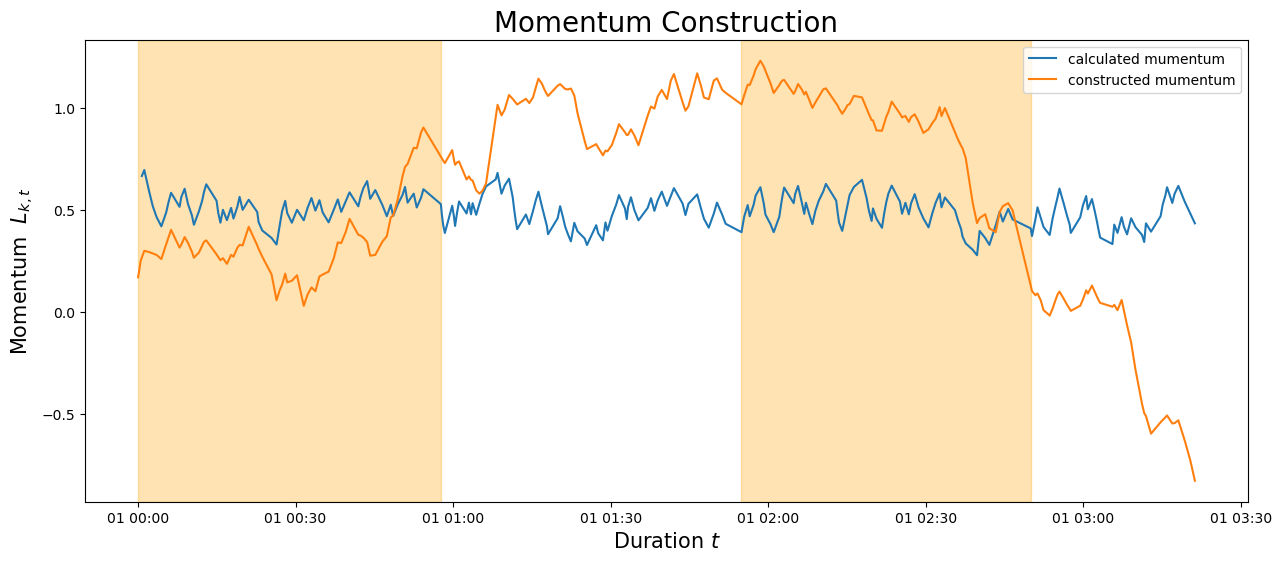

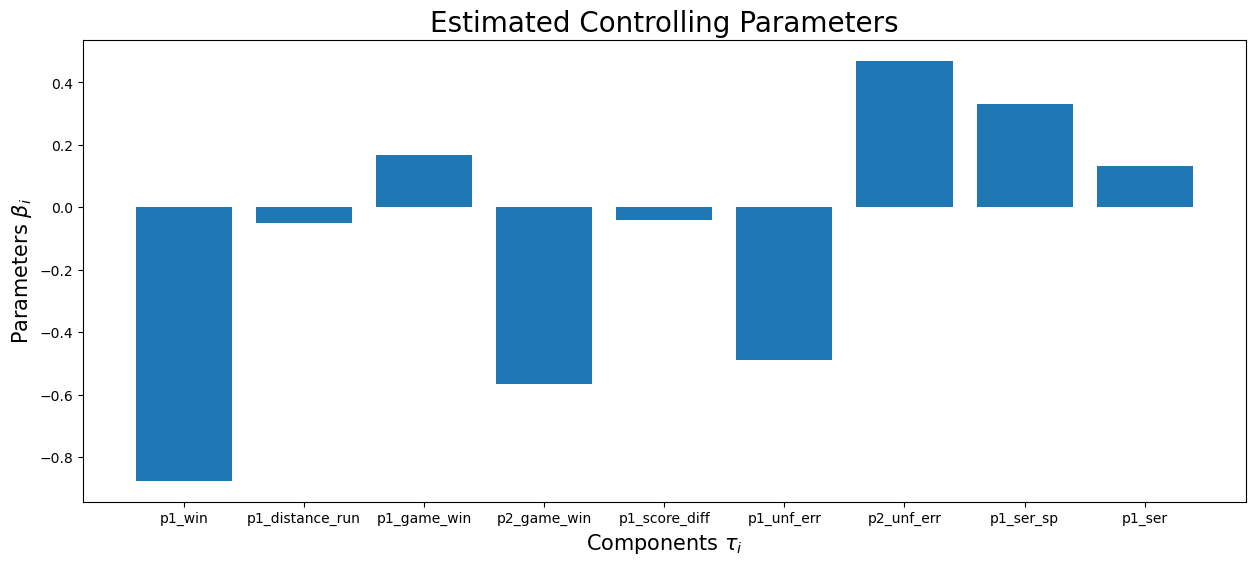

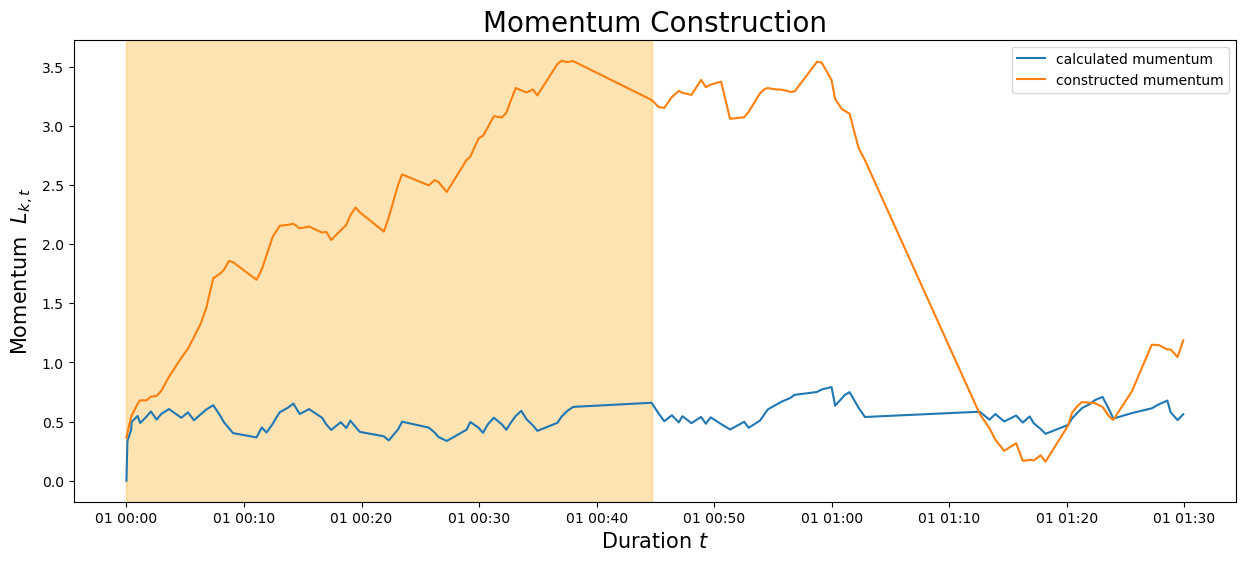

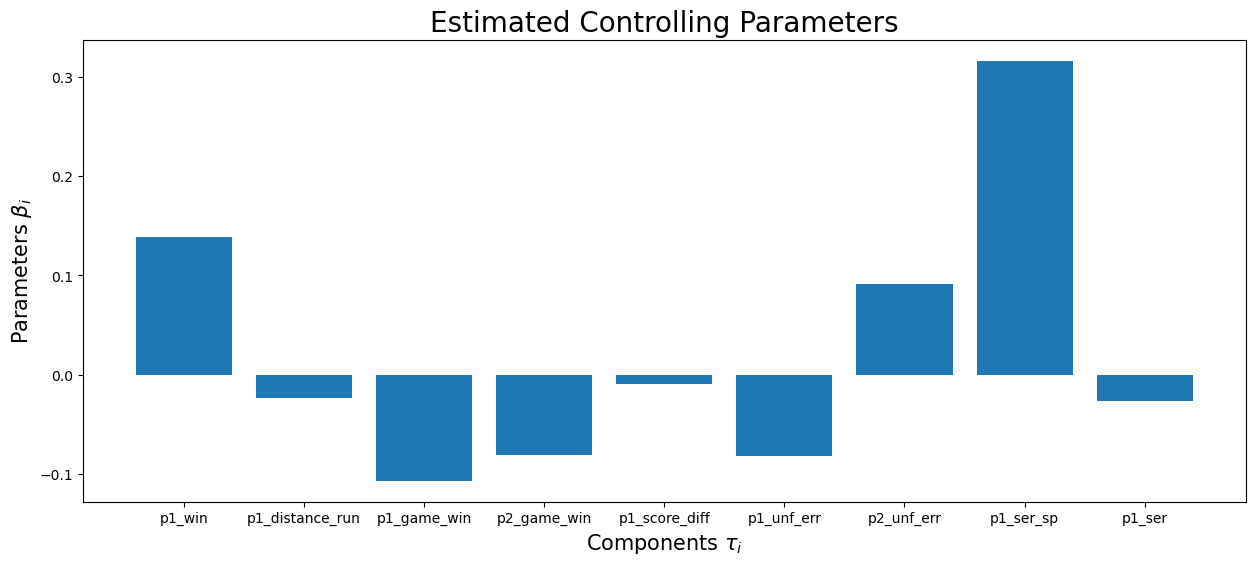

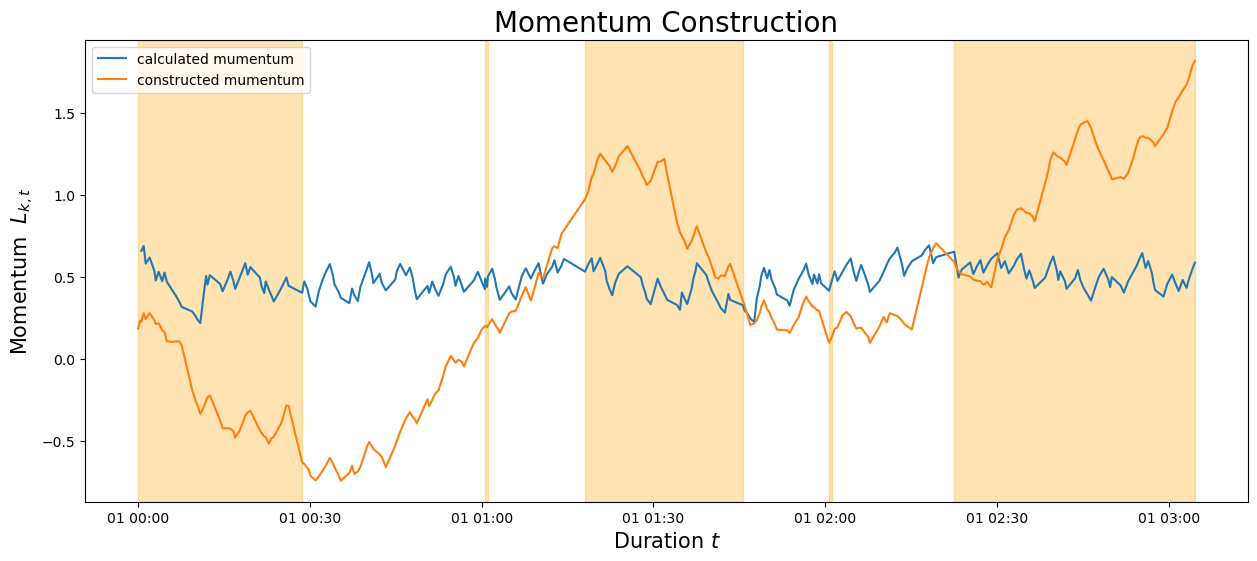

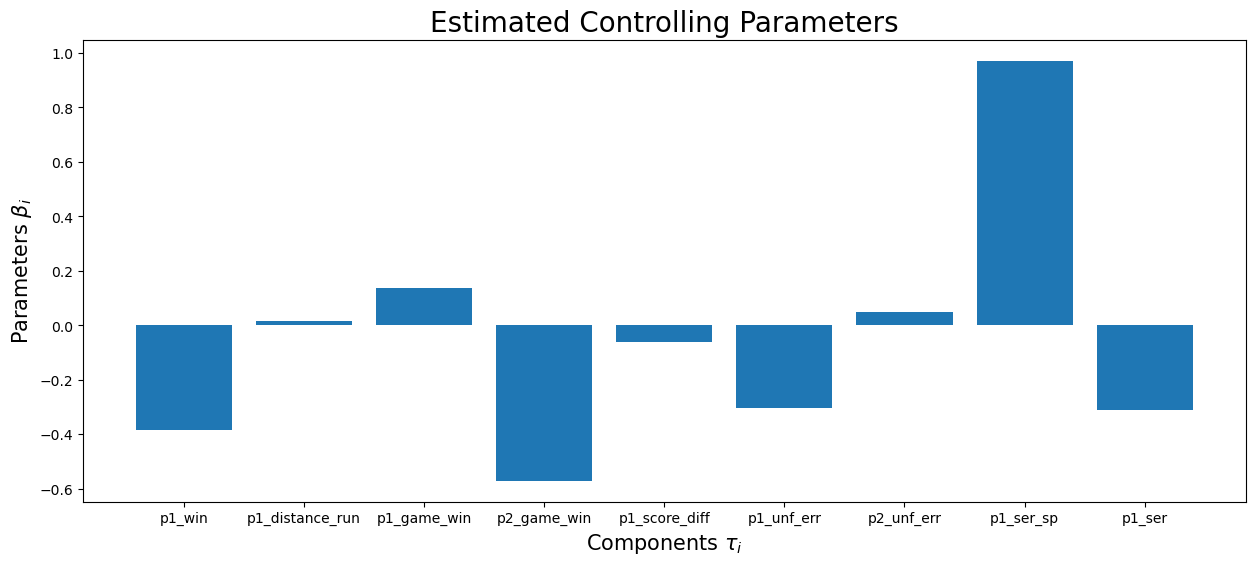

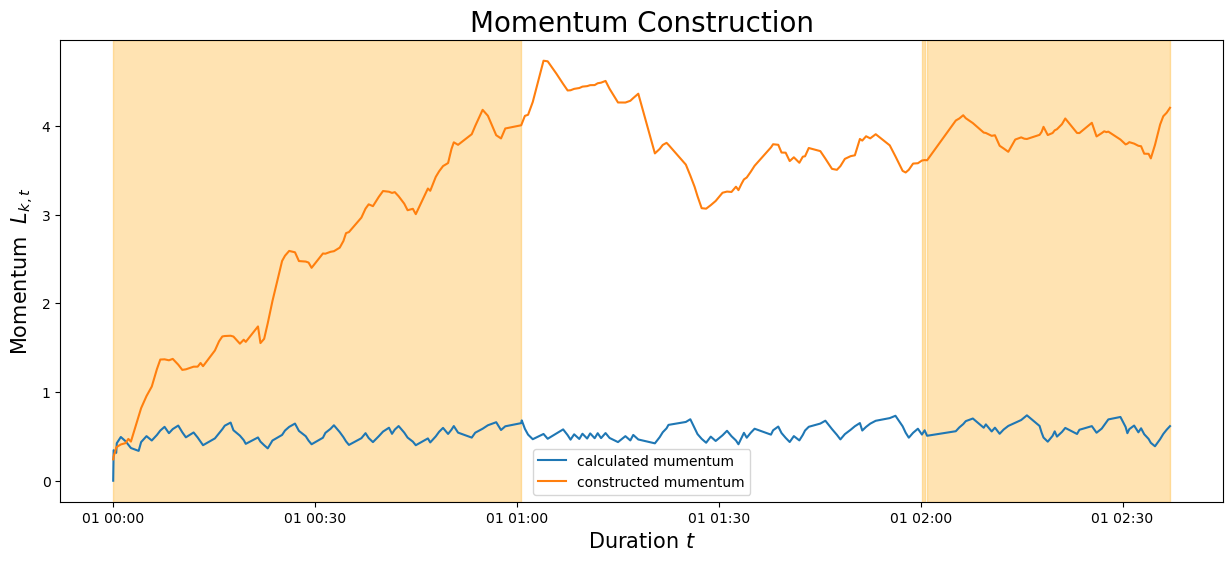

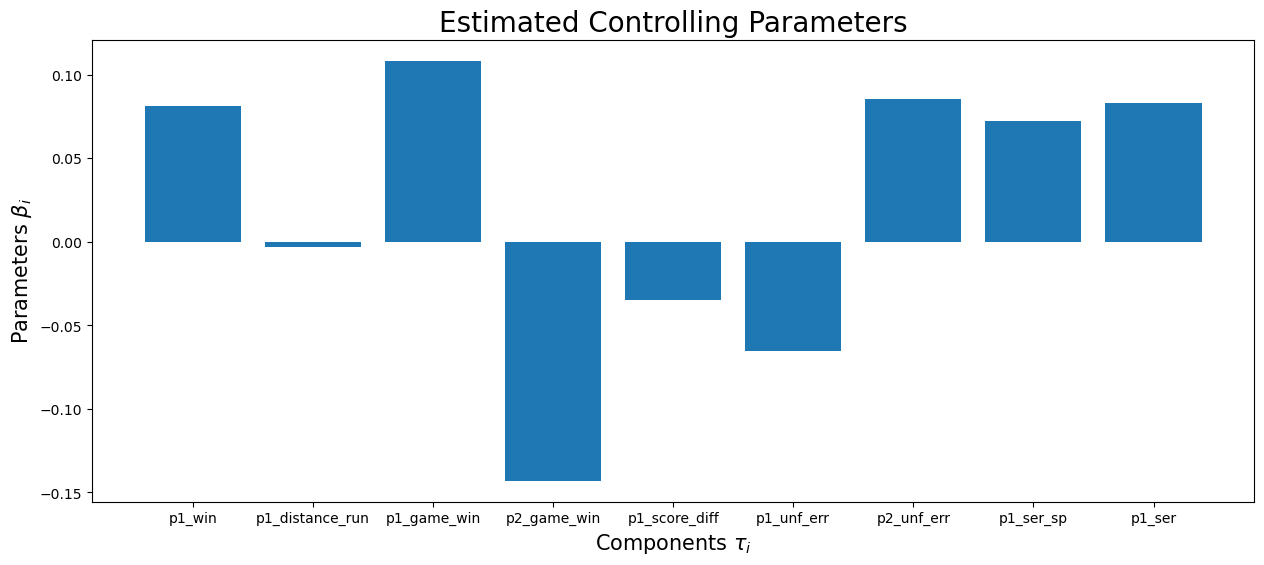

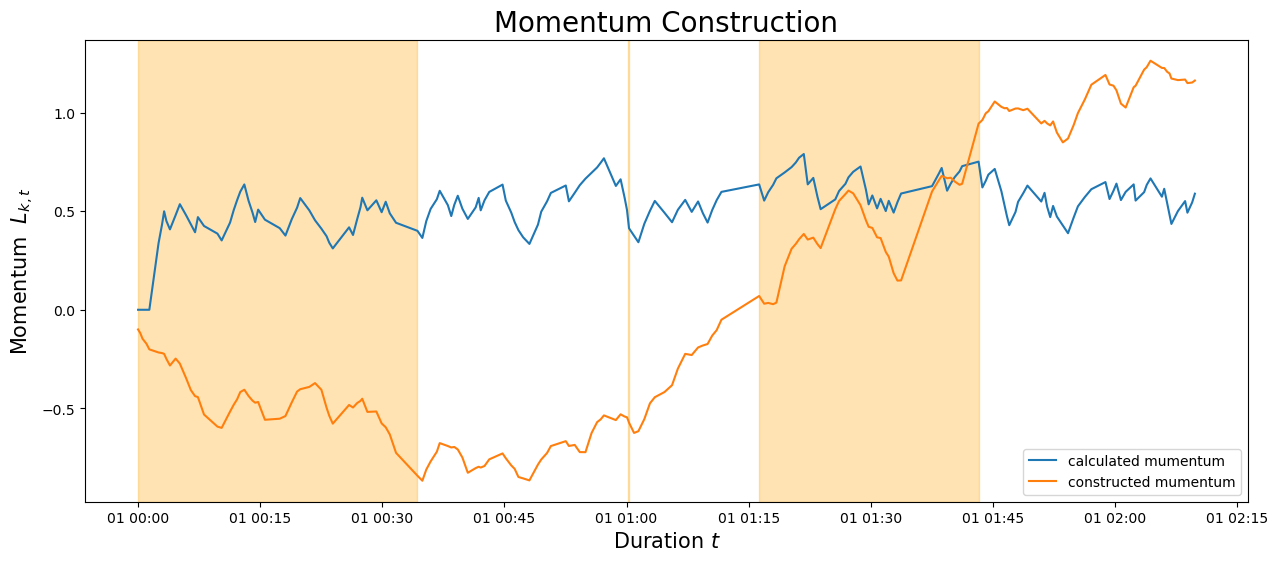

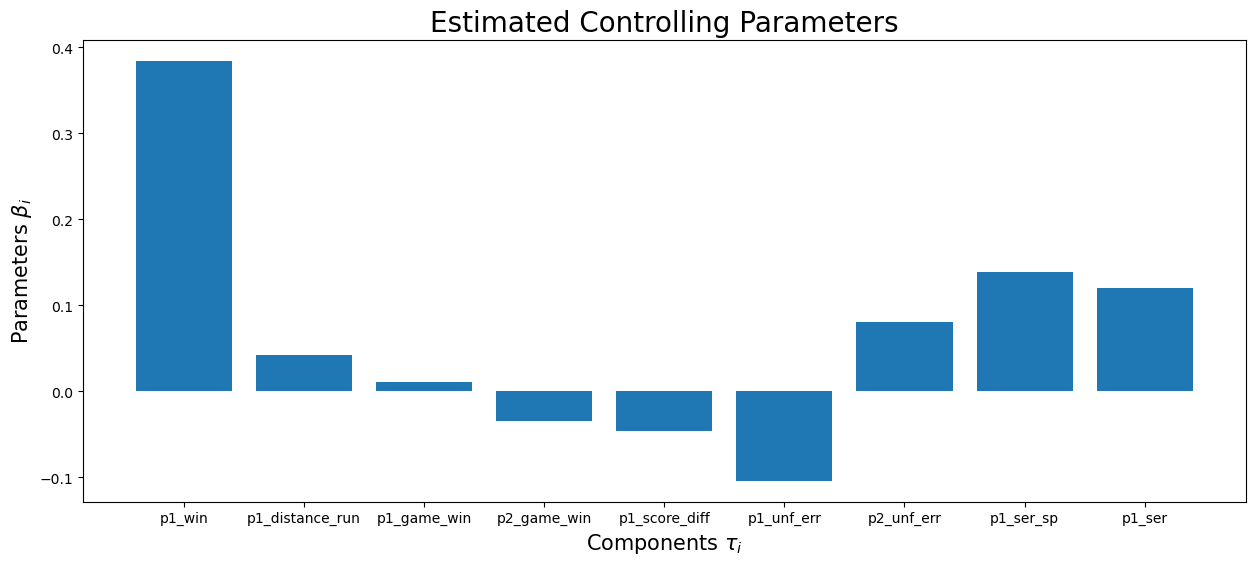

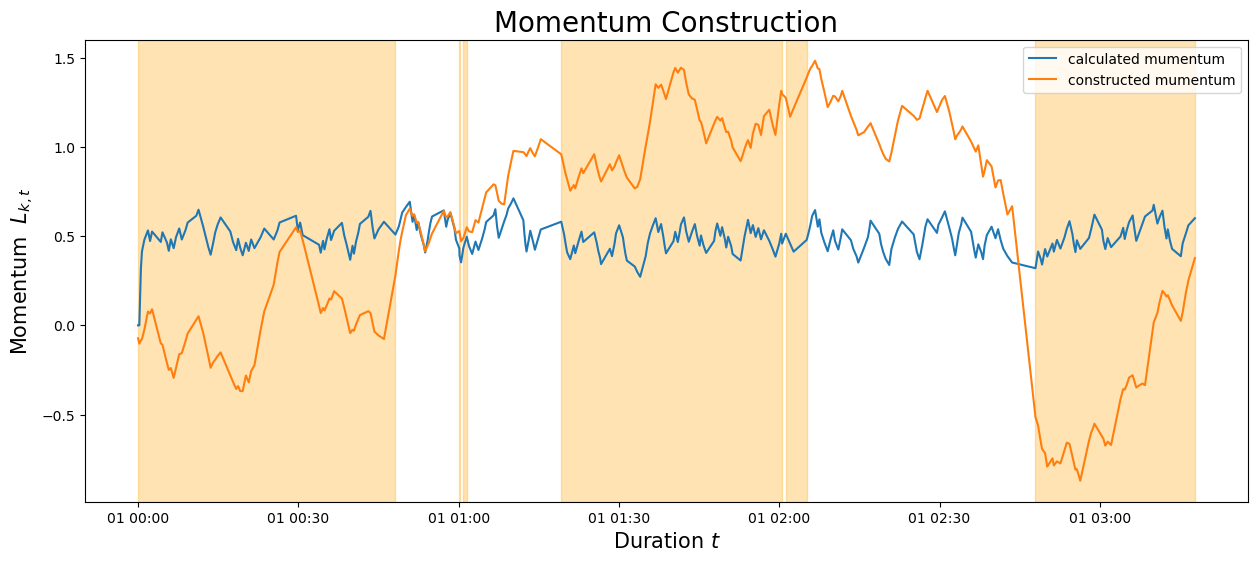

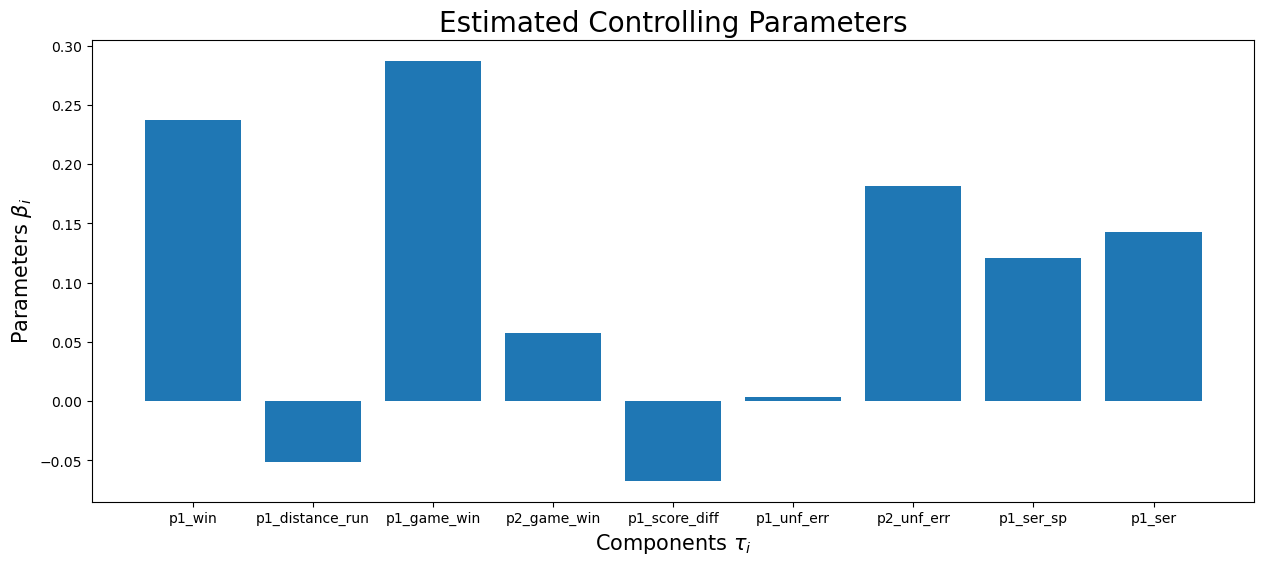

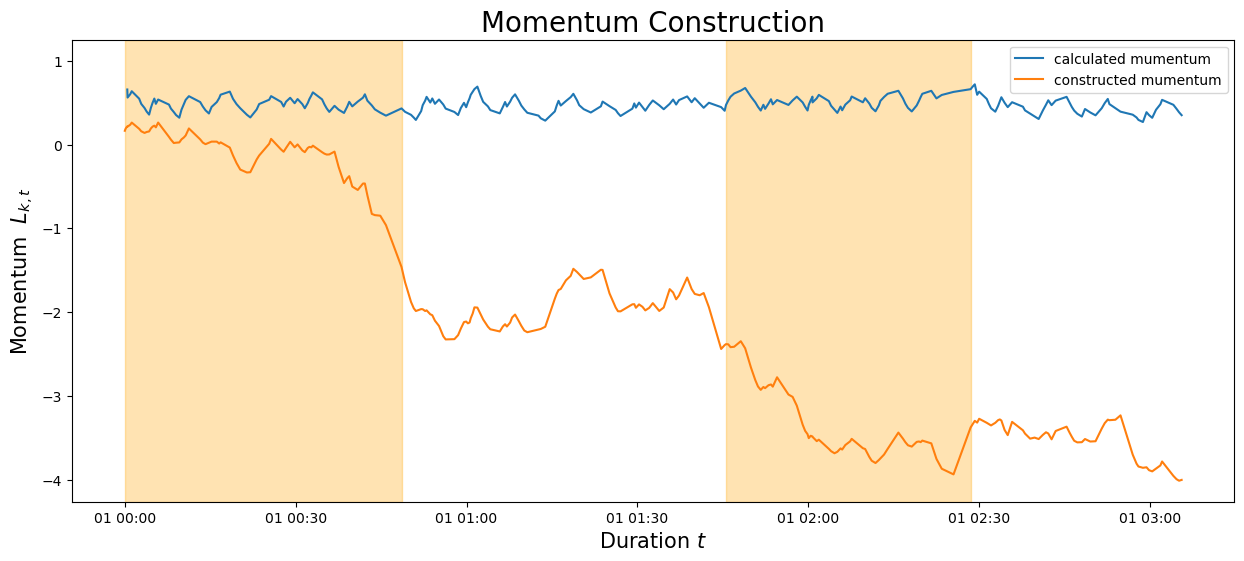

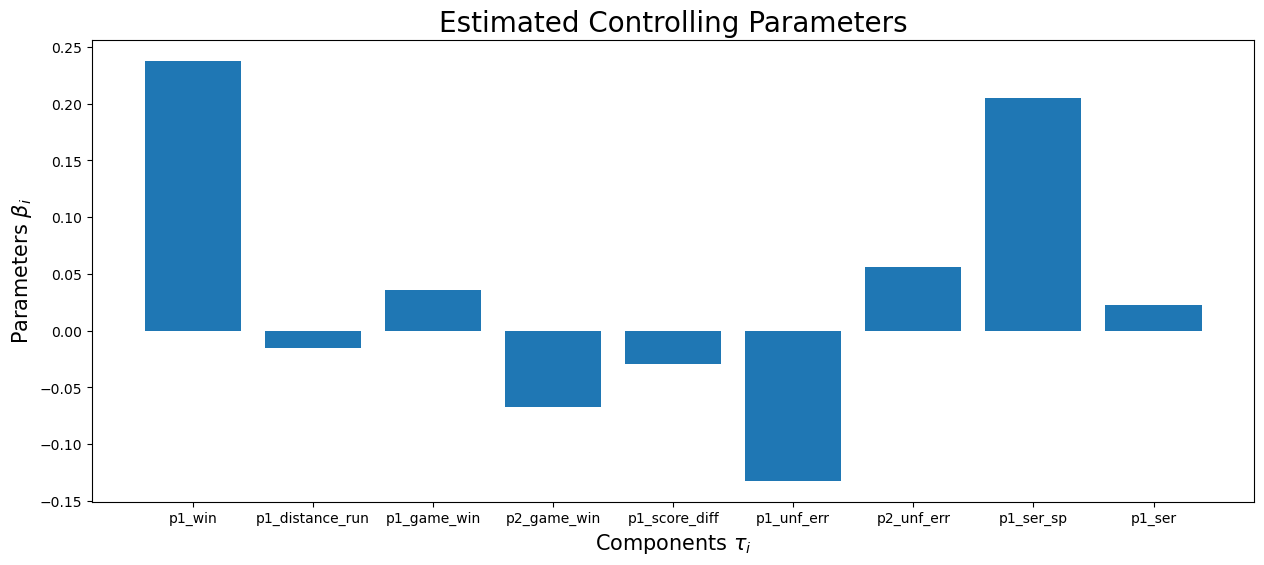

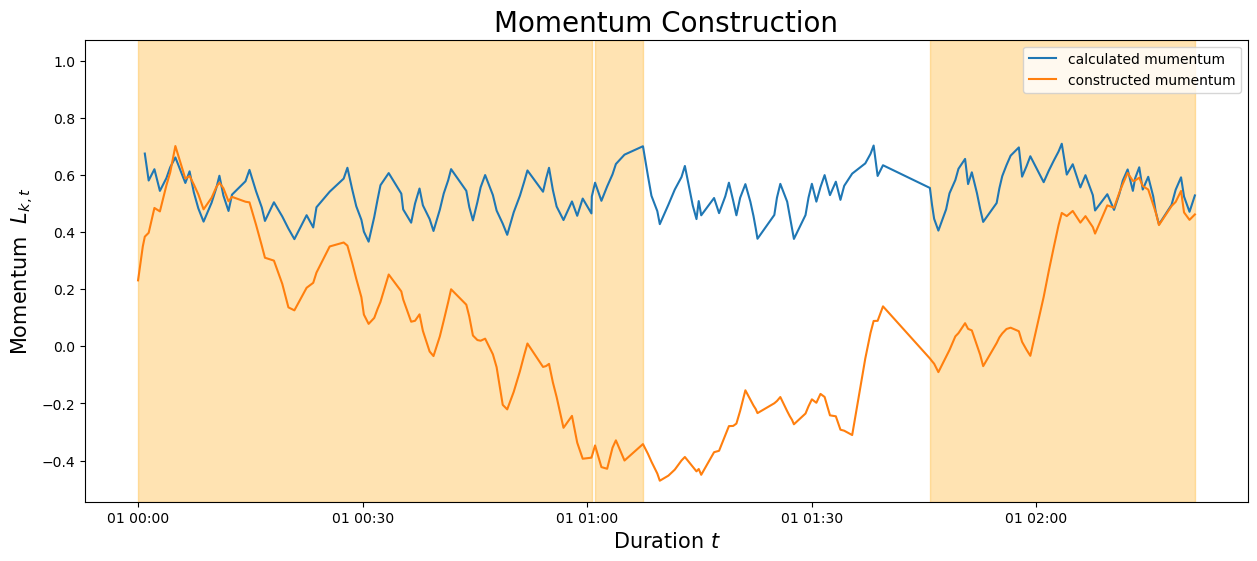

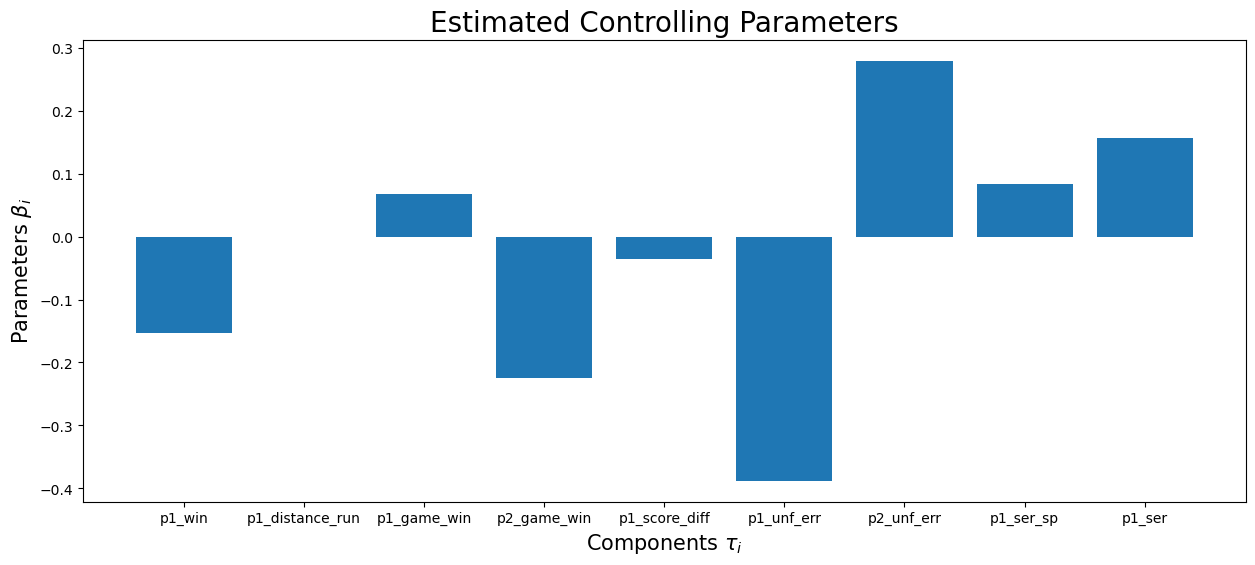

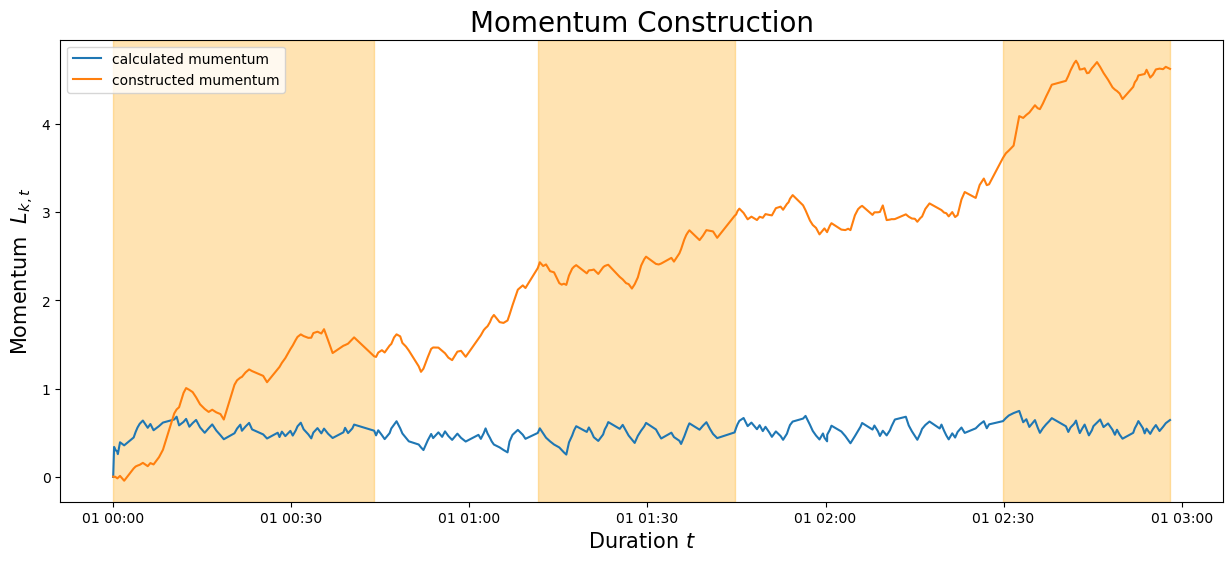

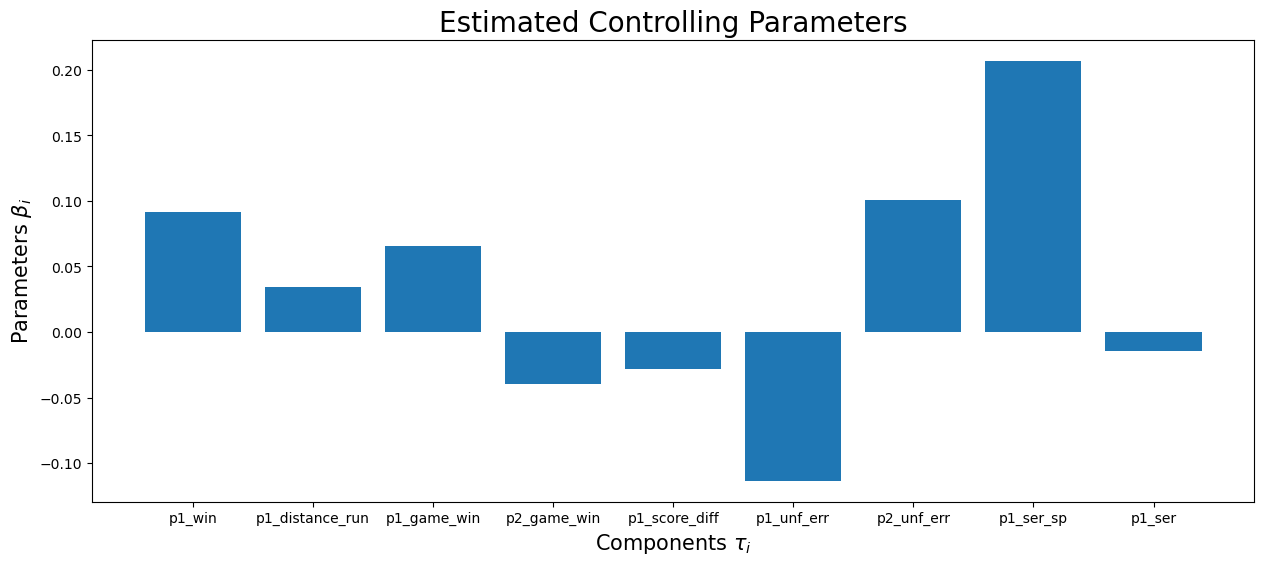

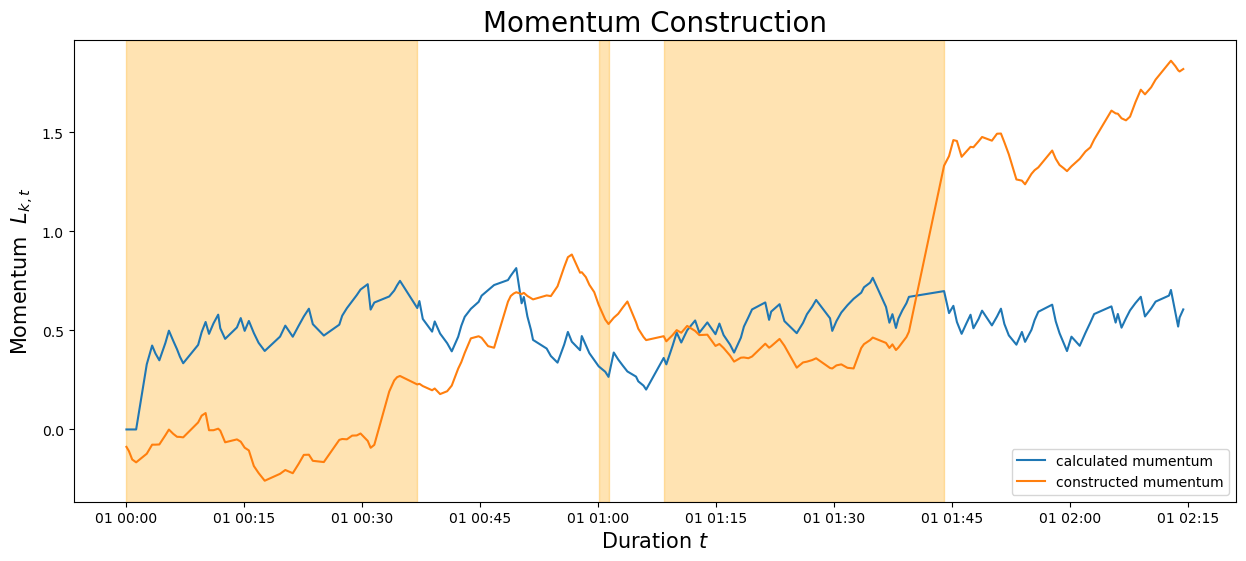

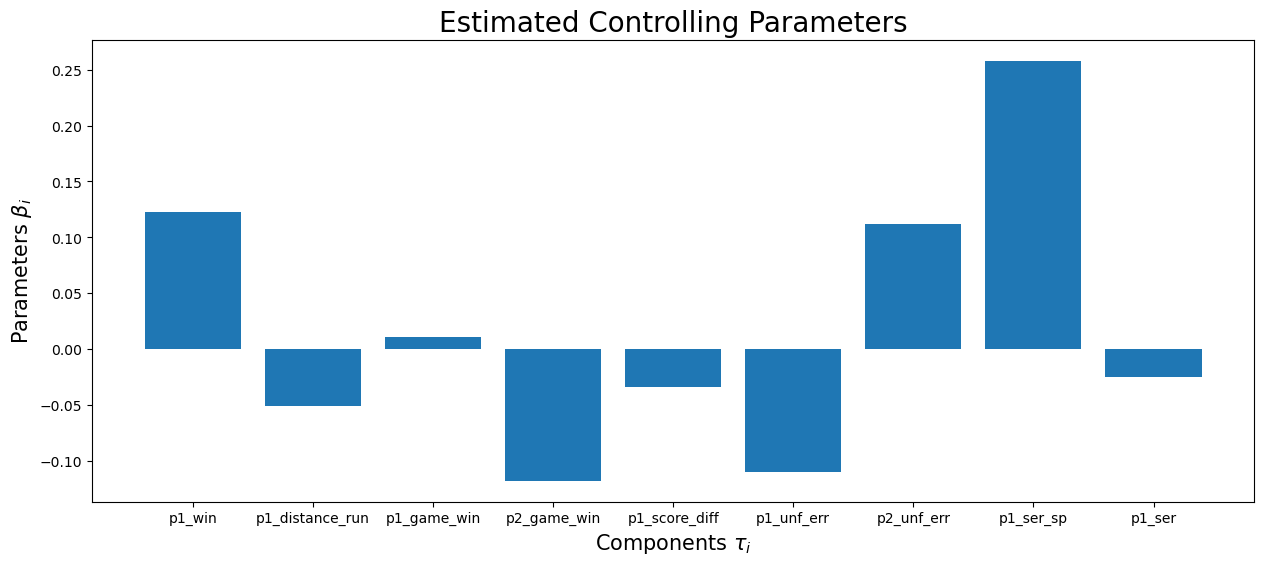

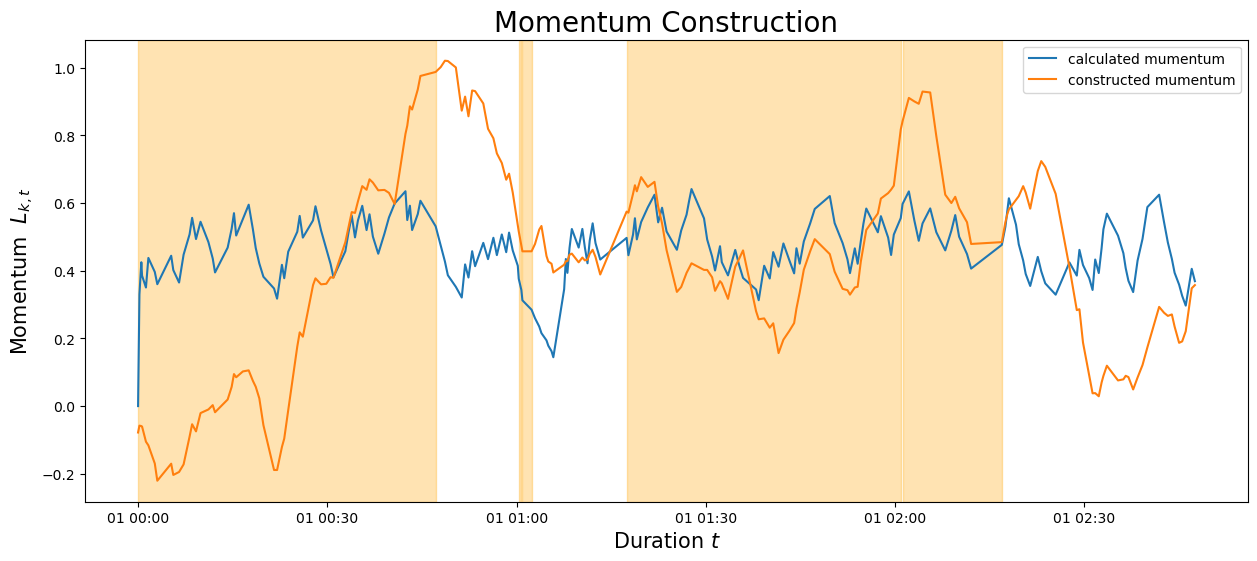

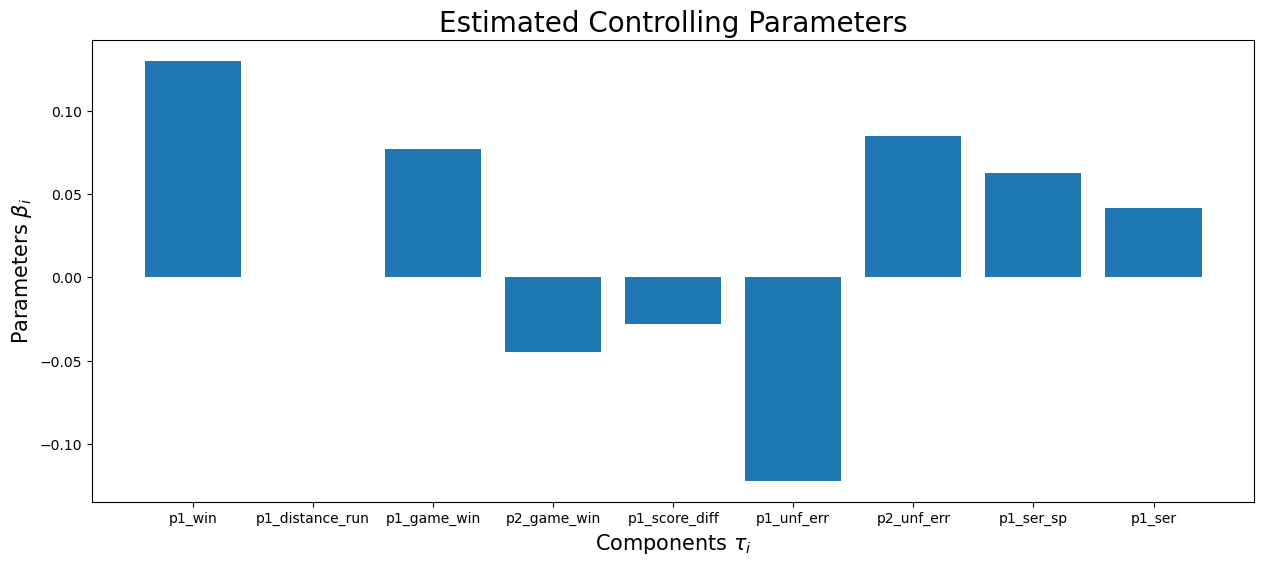

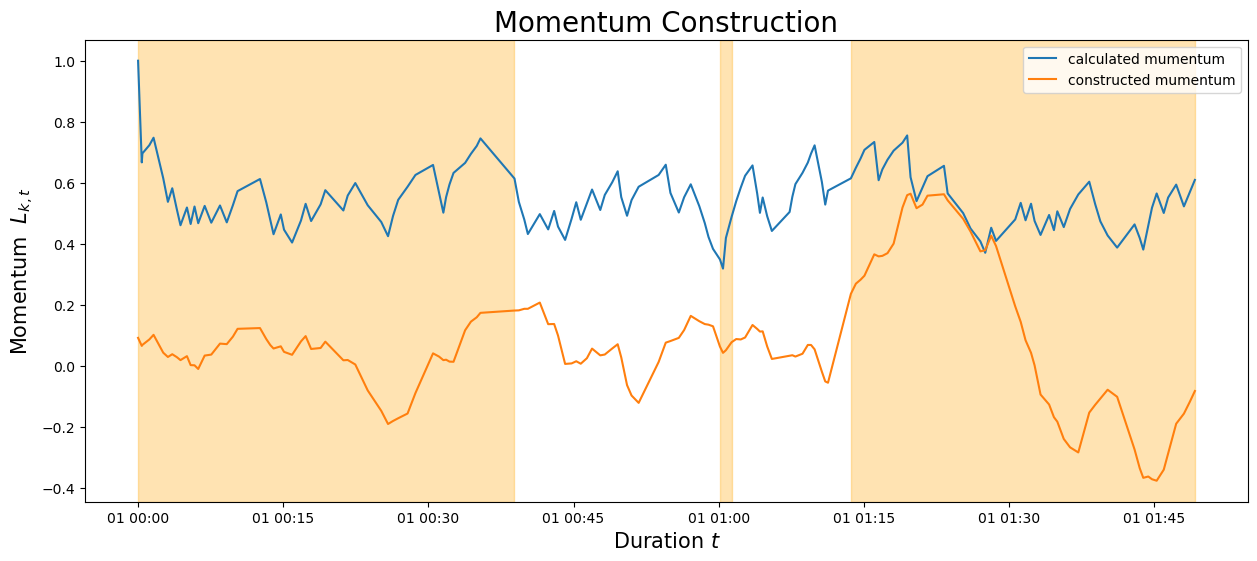

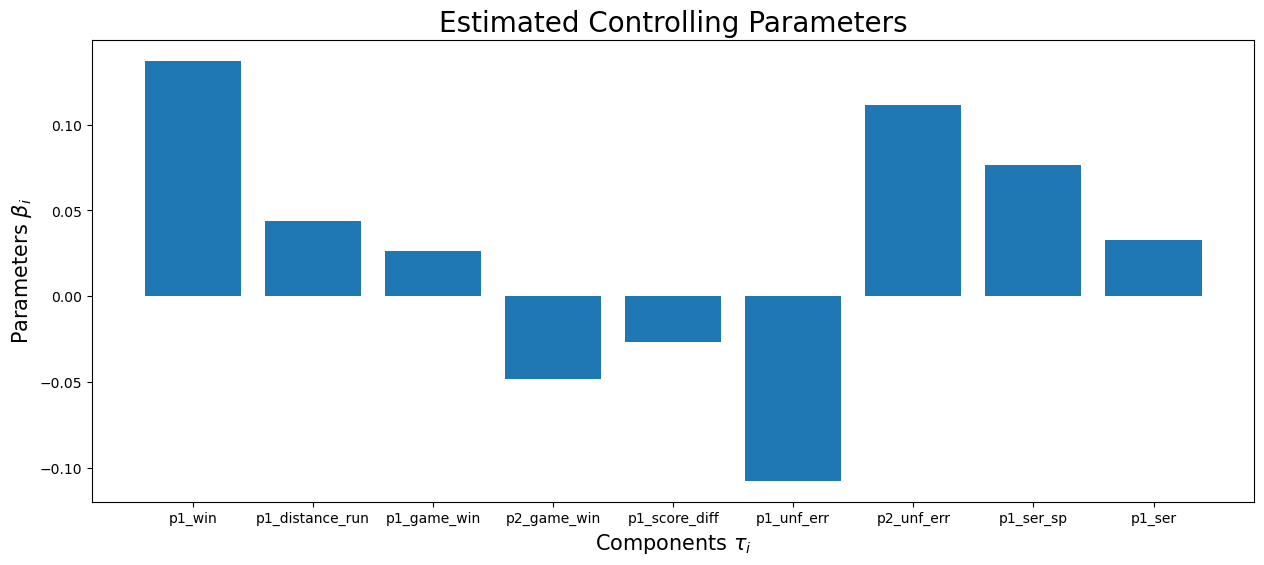

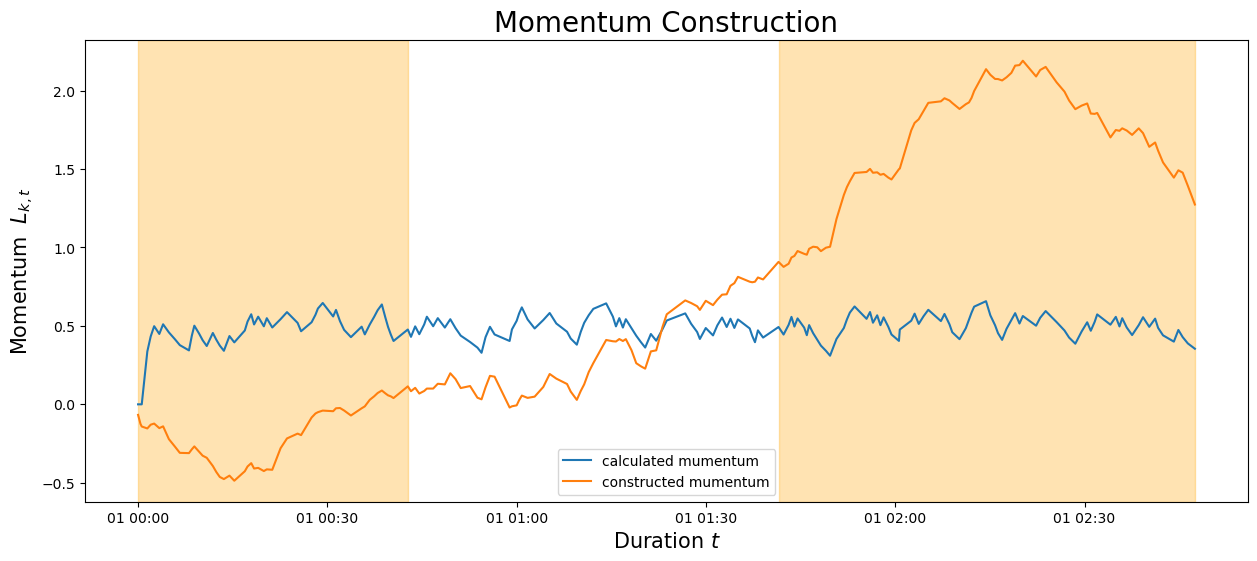

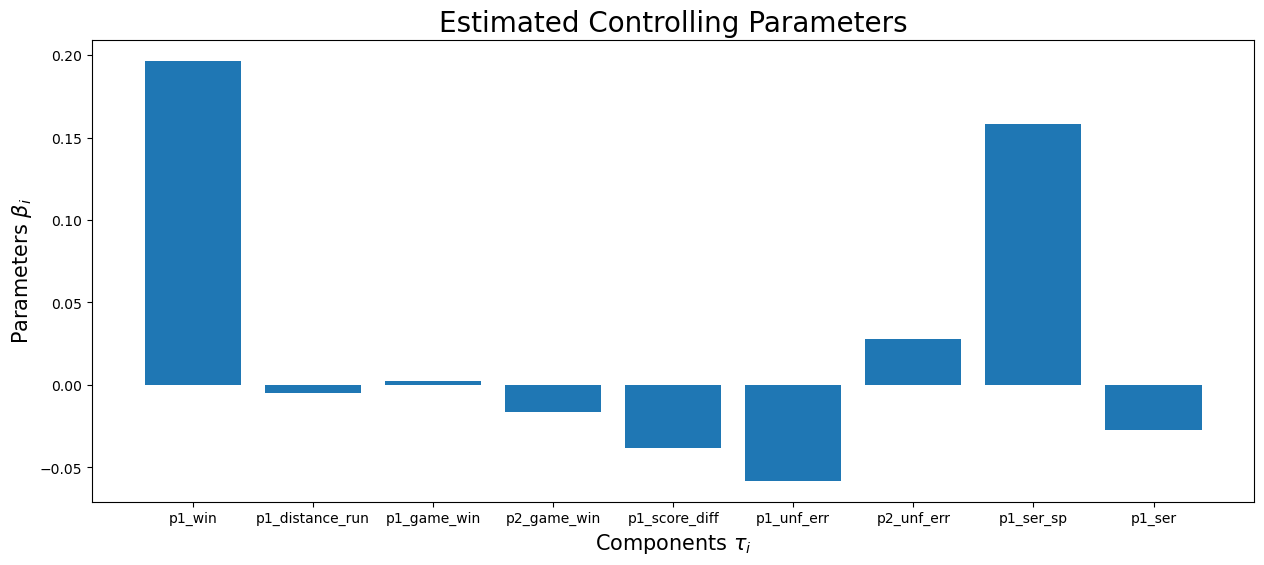

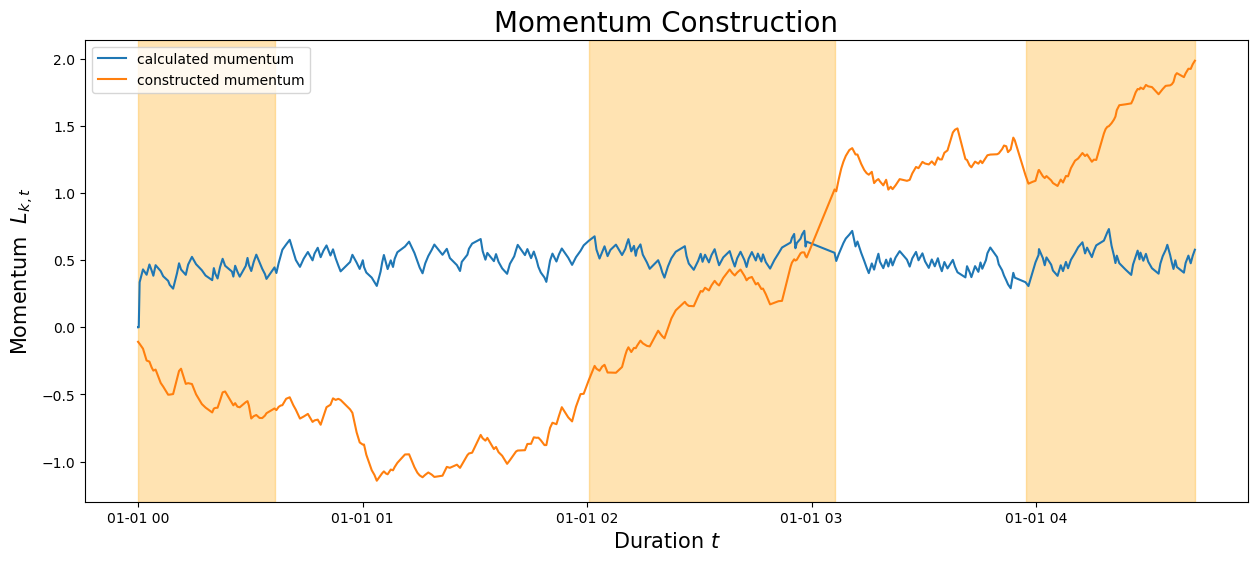

In [9]:
for index, row in pairs.iterrows():
    p1 = row["player1"]
    p2 = row["player2"]

    u = tr.ModelUnit(p1, p2, data)

    u.preprocess()
    u.prefilter()

    u.calc_torque(players["Inertia"])
    u.train(inputs)
    u.show_params()
    u.construct_momentum()